## ASSIGNMENT - 3 (NAIVE BAYES)
#### KRISHNA SAH TELI
#### GE22M018

#### IMPORTING LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### LOADING DATASET

In [3]:
df= pd.read_csv("adult.csv")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [12]:
# Information about the shape of data
print("The total number of data entry is {} and data features is {}".format(df.shape[0],df.shape[1]))

The total number of data entry is 32560 and data features is 15


In [13]:
# Finding the list of columns name

column_name= [x for x in df.columns]

print(column_name)

['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


##### Since some of the column names are not properly labelled, hence we will do renaming

In [4]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [15]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### DATA CLEANING

In [44]:
# Searching for nan 

df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

##### Since all colums have zero nan values, hence it is cleaned data and no missing value

#### DATATYPE CORRECTION

In [14]:
## Data type correction
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Exploring Categorical Data

In [16]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


so we have total 9 categorical features.

In [17]:
#printing categorical data
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [45]:
for i in categorical:
    print("For "+i)    
    print(df[i].value_counts())
    print("\n")

For workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


For education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


For marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64


For occupation
 P

1. work

In [17]:
df["workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Here we found invalid entry in workclass as "?" which is not a value. So we delete this entry.    

In [5]:
df['workclass'].replace(' ?', np.NaN, inplace=True)


2. occupation

In [51]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

Here also we found an invalid data entry as "?". So we delete it.

In [6]:
df['occupation'].replace(' ?', np.NaN, inplace=True)
print("The total number of entry as ? :"+str(df["occupation"].isna().sum()))


The total number of entry as ? :1843


3. native_country

In [58]:
df.native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Here also we found invalid entry "?". So we will delete it.

In [7]:
df['native_country'].replace(' ?', np.NaN, inplace=True)
print("The total number of entry as ? :"+str(df["native_country"].isna().sum()))

The total number of entry as ? :583


4. education

In [60]:
df.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

It is ok

5. marital_status

In [61]:
df.marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

It is also ok

In [62]:
df.relationship.value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [63]:
df.race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [65]:
df.sex.value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

In [66]:
df.income.value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

So remaining categorical data is ok

##### Exploring numerical Data

In [67]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [68]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


So all of numerical data are discrete type

Removing missing values 

In [38]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [9]:
df= df.dropna()

In [10]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

There is no missing values

In [11]:
df.shape

(30161, 15)

#### DATA ANALYSIS

In [70]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [119]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


##### Income

Text(0.5, 1.0, 'Population Distribution Based on Income')

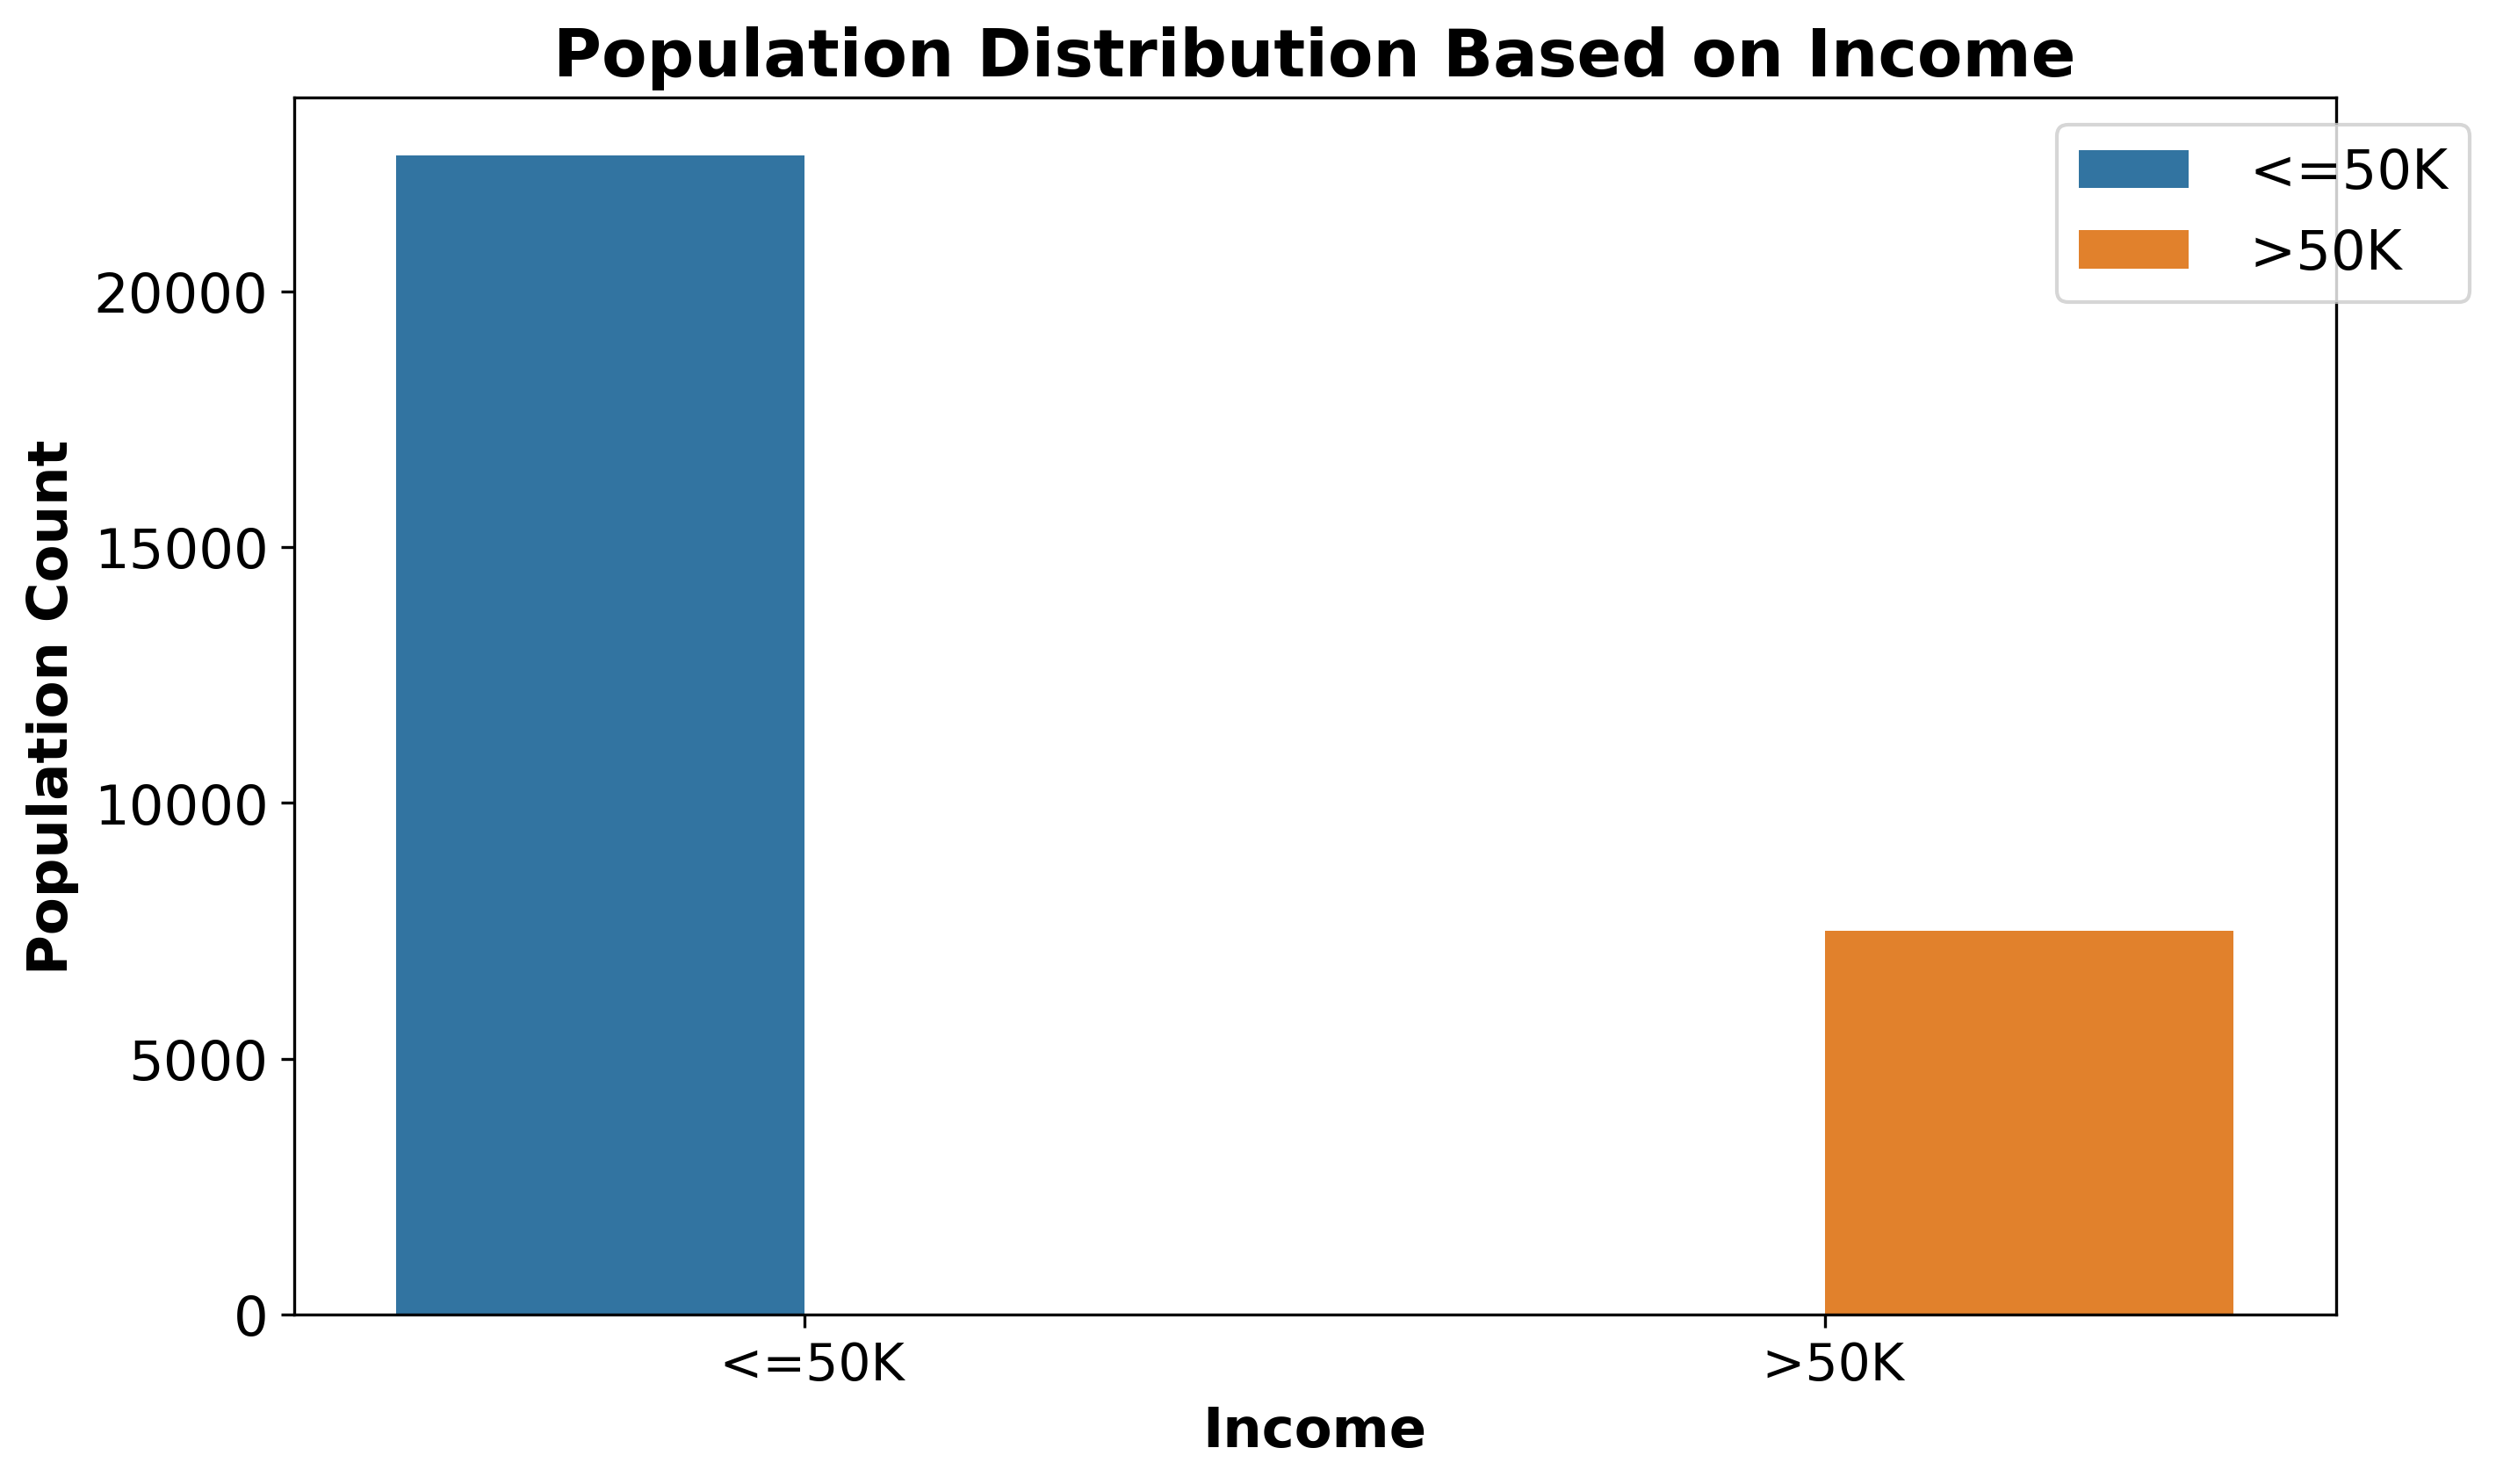

In [67]:
plt.figure(figsize=(10,6), dpi=300)
sns.countplot(x="income", data=df, hue= "income")
plt.xlabel("Income", fontsize=15, fontweight="bold")
plt.ylabel("Population Count", fontsize=15, fontweight= "bold")
plt.xticks(fontsize= 14)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, bbox_to_anchor=(0.85,1))
plt.title("Population Distribution Based on Income", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('income.png', dpi=300)

It illustrates that the population having income more than 50 thousand is less than half of the population having income less than 50K.

##### Based on workclass

Text(0.5, 1.0, 'Visualiation of Population Based on Workclass')

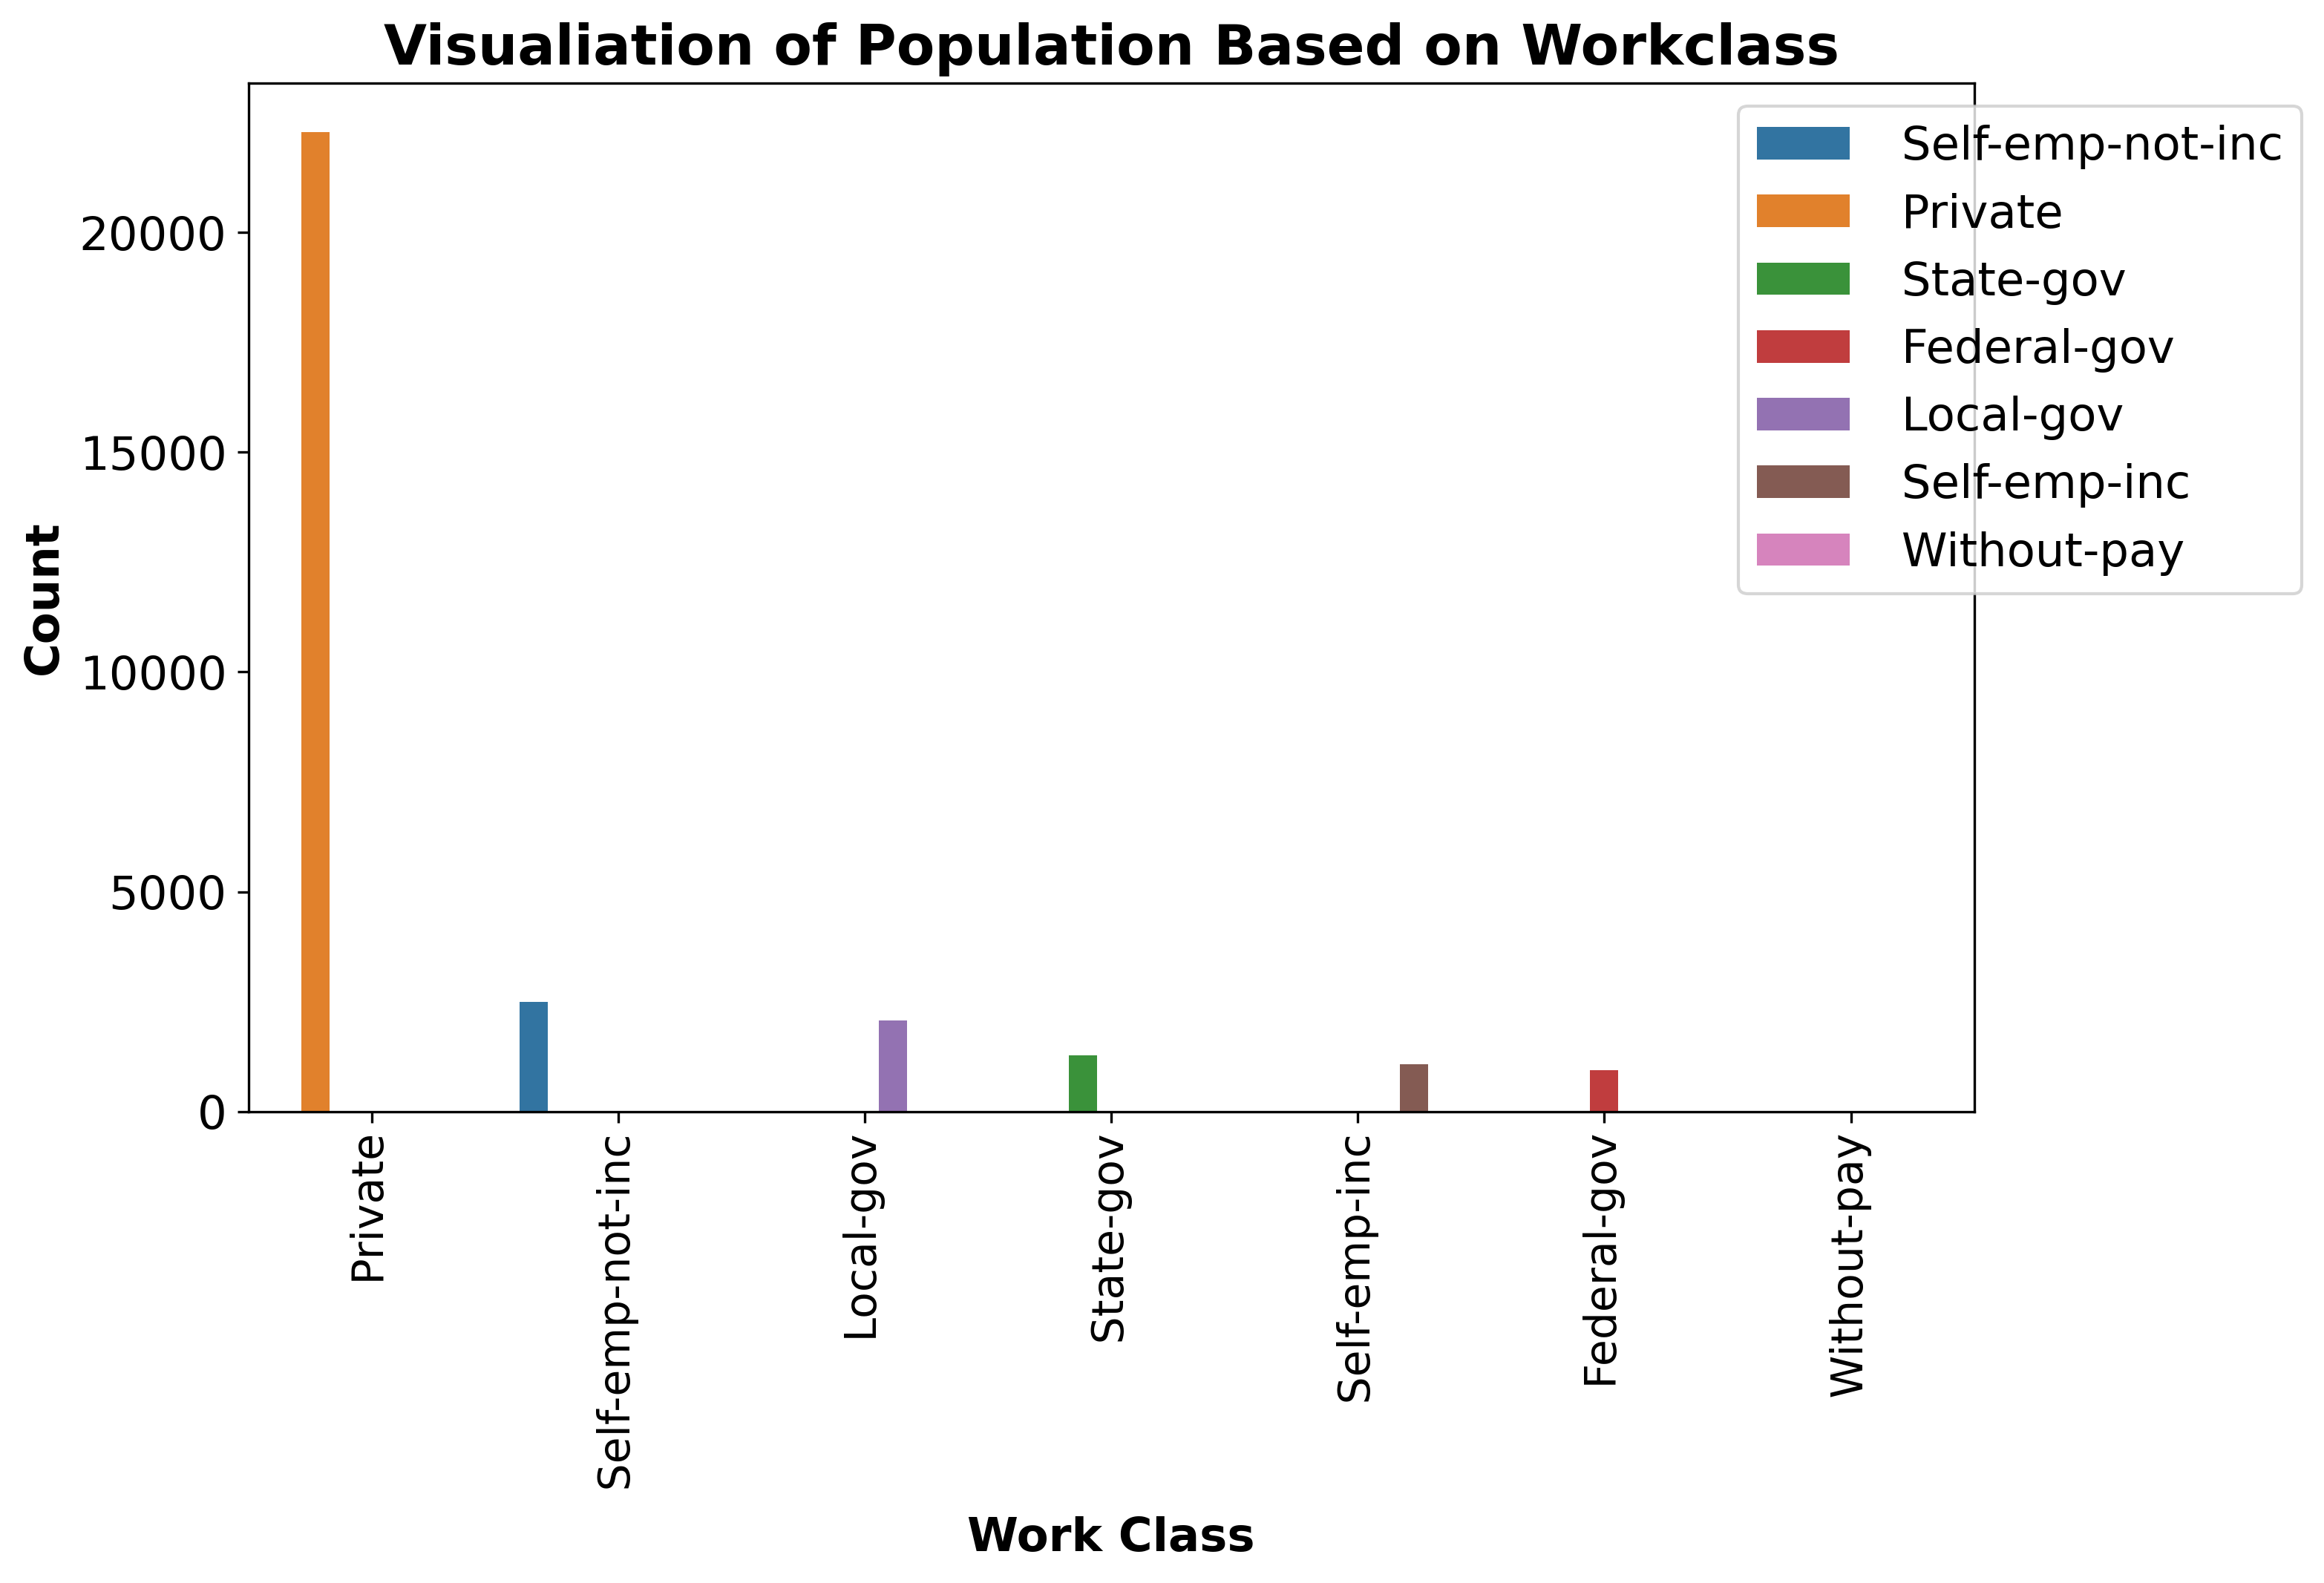

In [66]:
plt.figure(figsize=(10,6), dpi= 300)
sns.countplot(x="workclass", data=df, hue= "workclass", order= df["workclass"].value_counts().index)
plt.xlabel("Work Class", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight= "bold")
plt.xticks(rotation="vertical", fontsize= 14)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, bbox_to_anchor=(0.85,1))
plt.title("Visualiation of Population Based on Workclass", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('count_workclass.png', dpi=300)

It shows that the population of working in private company is exponentially higher than others.

Text(0.5, 1.0, 'Income Visualization Based on Workclass')

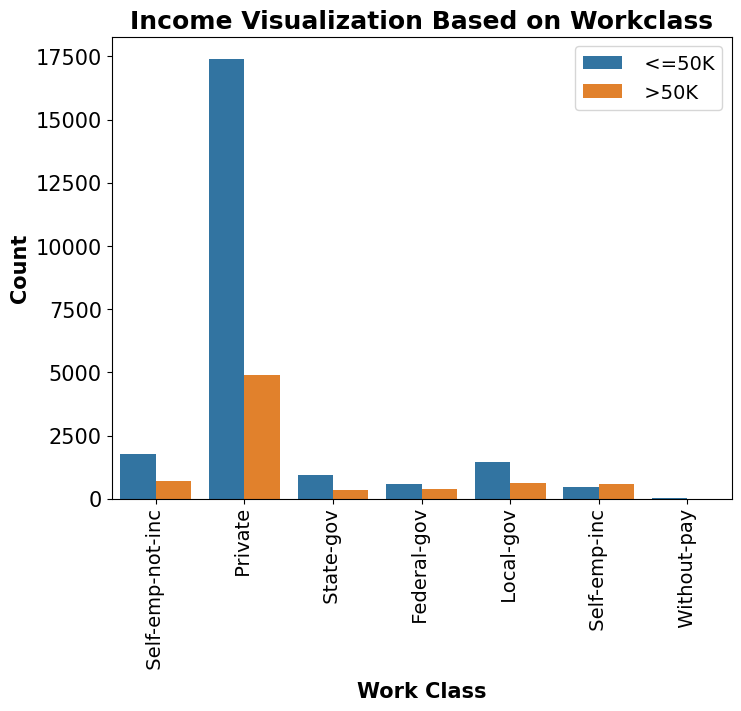

In [157]:
plt.figure(figsize=(8,6))
sns.countplot(x="workclass", data=df, hue= "income")
plt.xlabel("Work Class", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight= "bold")
plt.xticks(rotation="vertical", fontsize= 14)
plt.yticks(fontsize=15)
plt.legend(loc="upper right", fontsize=14)
plt.title("Income Visualization Based on Workclass", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('income_workclass.png', dpi=300)

It shows the number of employee having wages less than 50K is higher regardless the kind of workclass. However, it is reverse in case of self employed.

##### Based on Age group

Text(0.5, 1.0, 'Income Visualization Based on Age group')

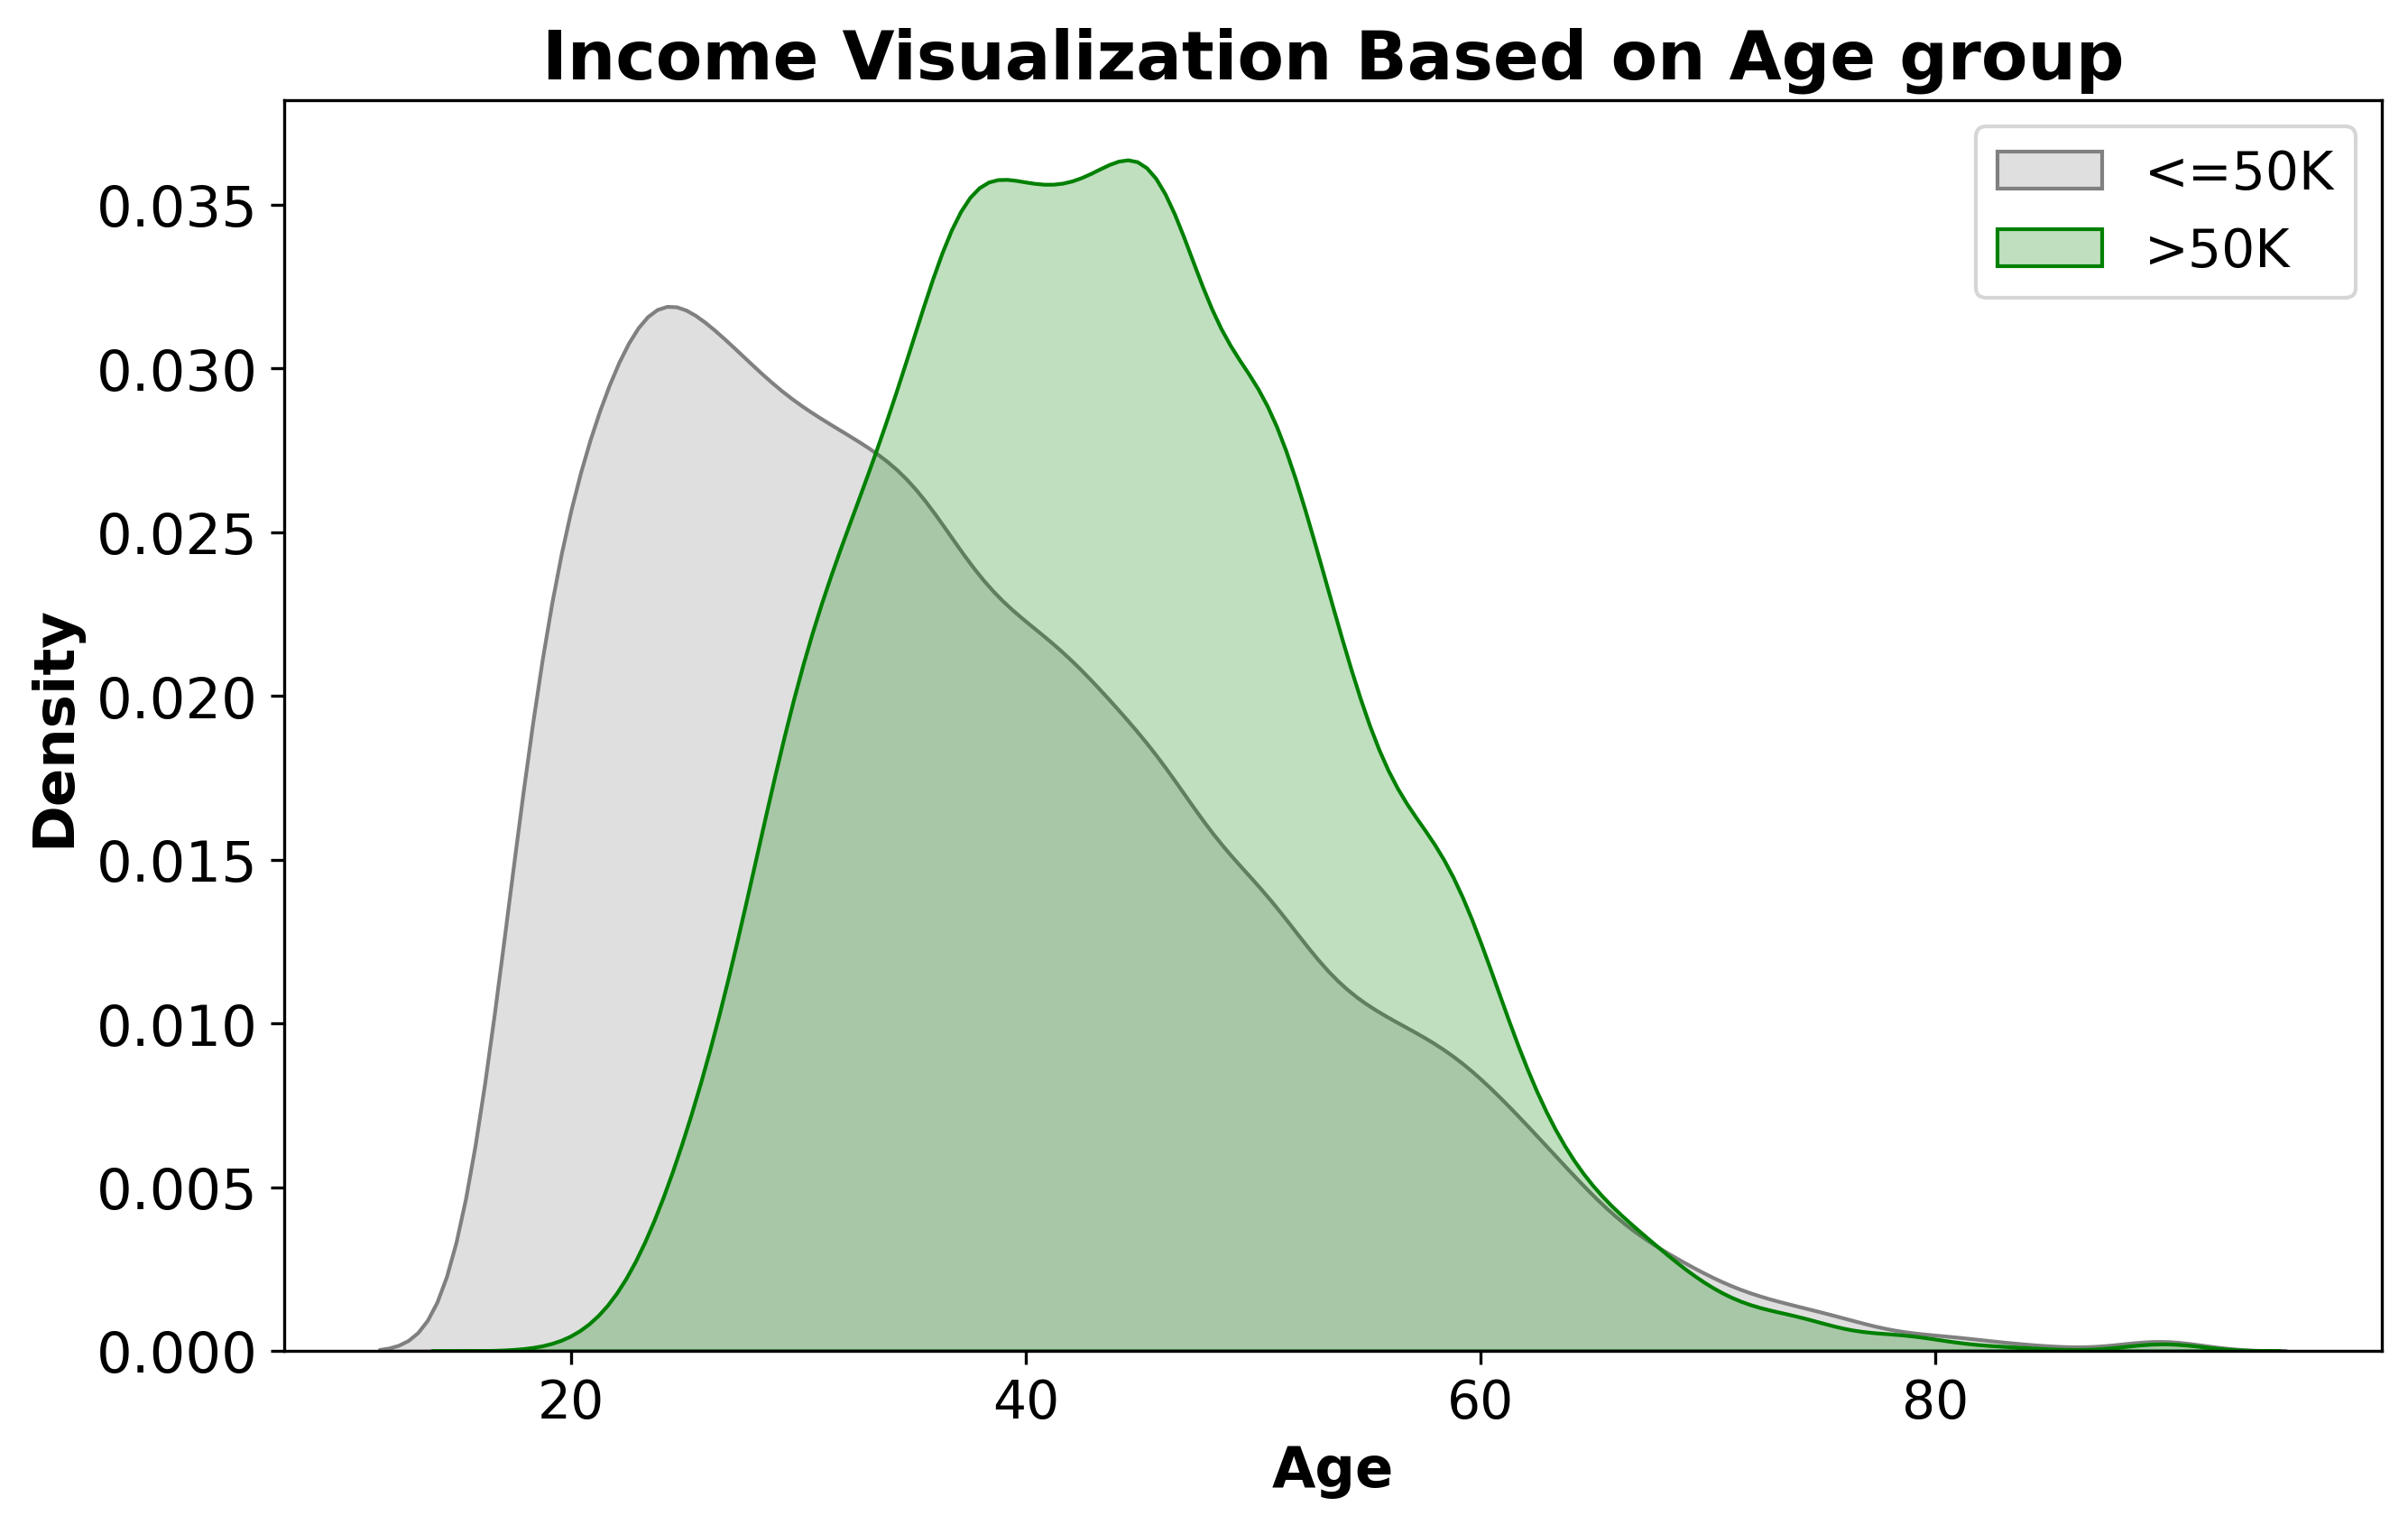

In [68]:
plt.figure(figsize=(10,6), dpi=300)
ax=sns.kdeplot(df.loc[(df['income'] ==" <=50K"),'age'] , color='gray',shade=True,label='<=50K')
ax=sns.kdeplot(df.loc[(df['income'] == " >50K"),'age'] , color='g',shade=True, label='>50K')
plt.xlabel("Age", fontsize=15, fontweight="bold")
plt.ylabel("Density", fontsize=15, fontweight= "bold")
plt.xticks(fontsize= 14)
plt.yticks(fontsize=15)
plt.legend(loc="upper right", fontsize=14)
plt.title("Income Visualization Based on Age group", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('survive1.png', dpi=300)

It shows that the childworkers wages are generally less than 50 K. Among the population of age group 30-60 years, the proportion of population earning more than 50k is more. 

##### Based on Education

Text(0.5, 1.0, 'Population Count Based on Education')

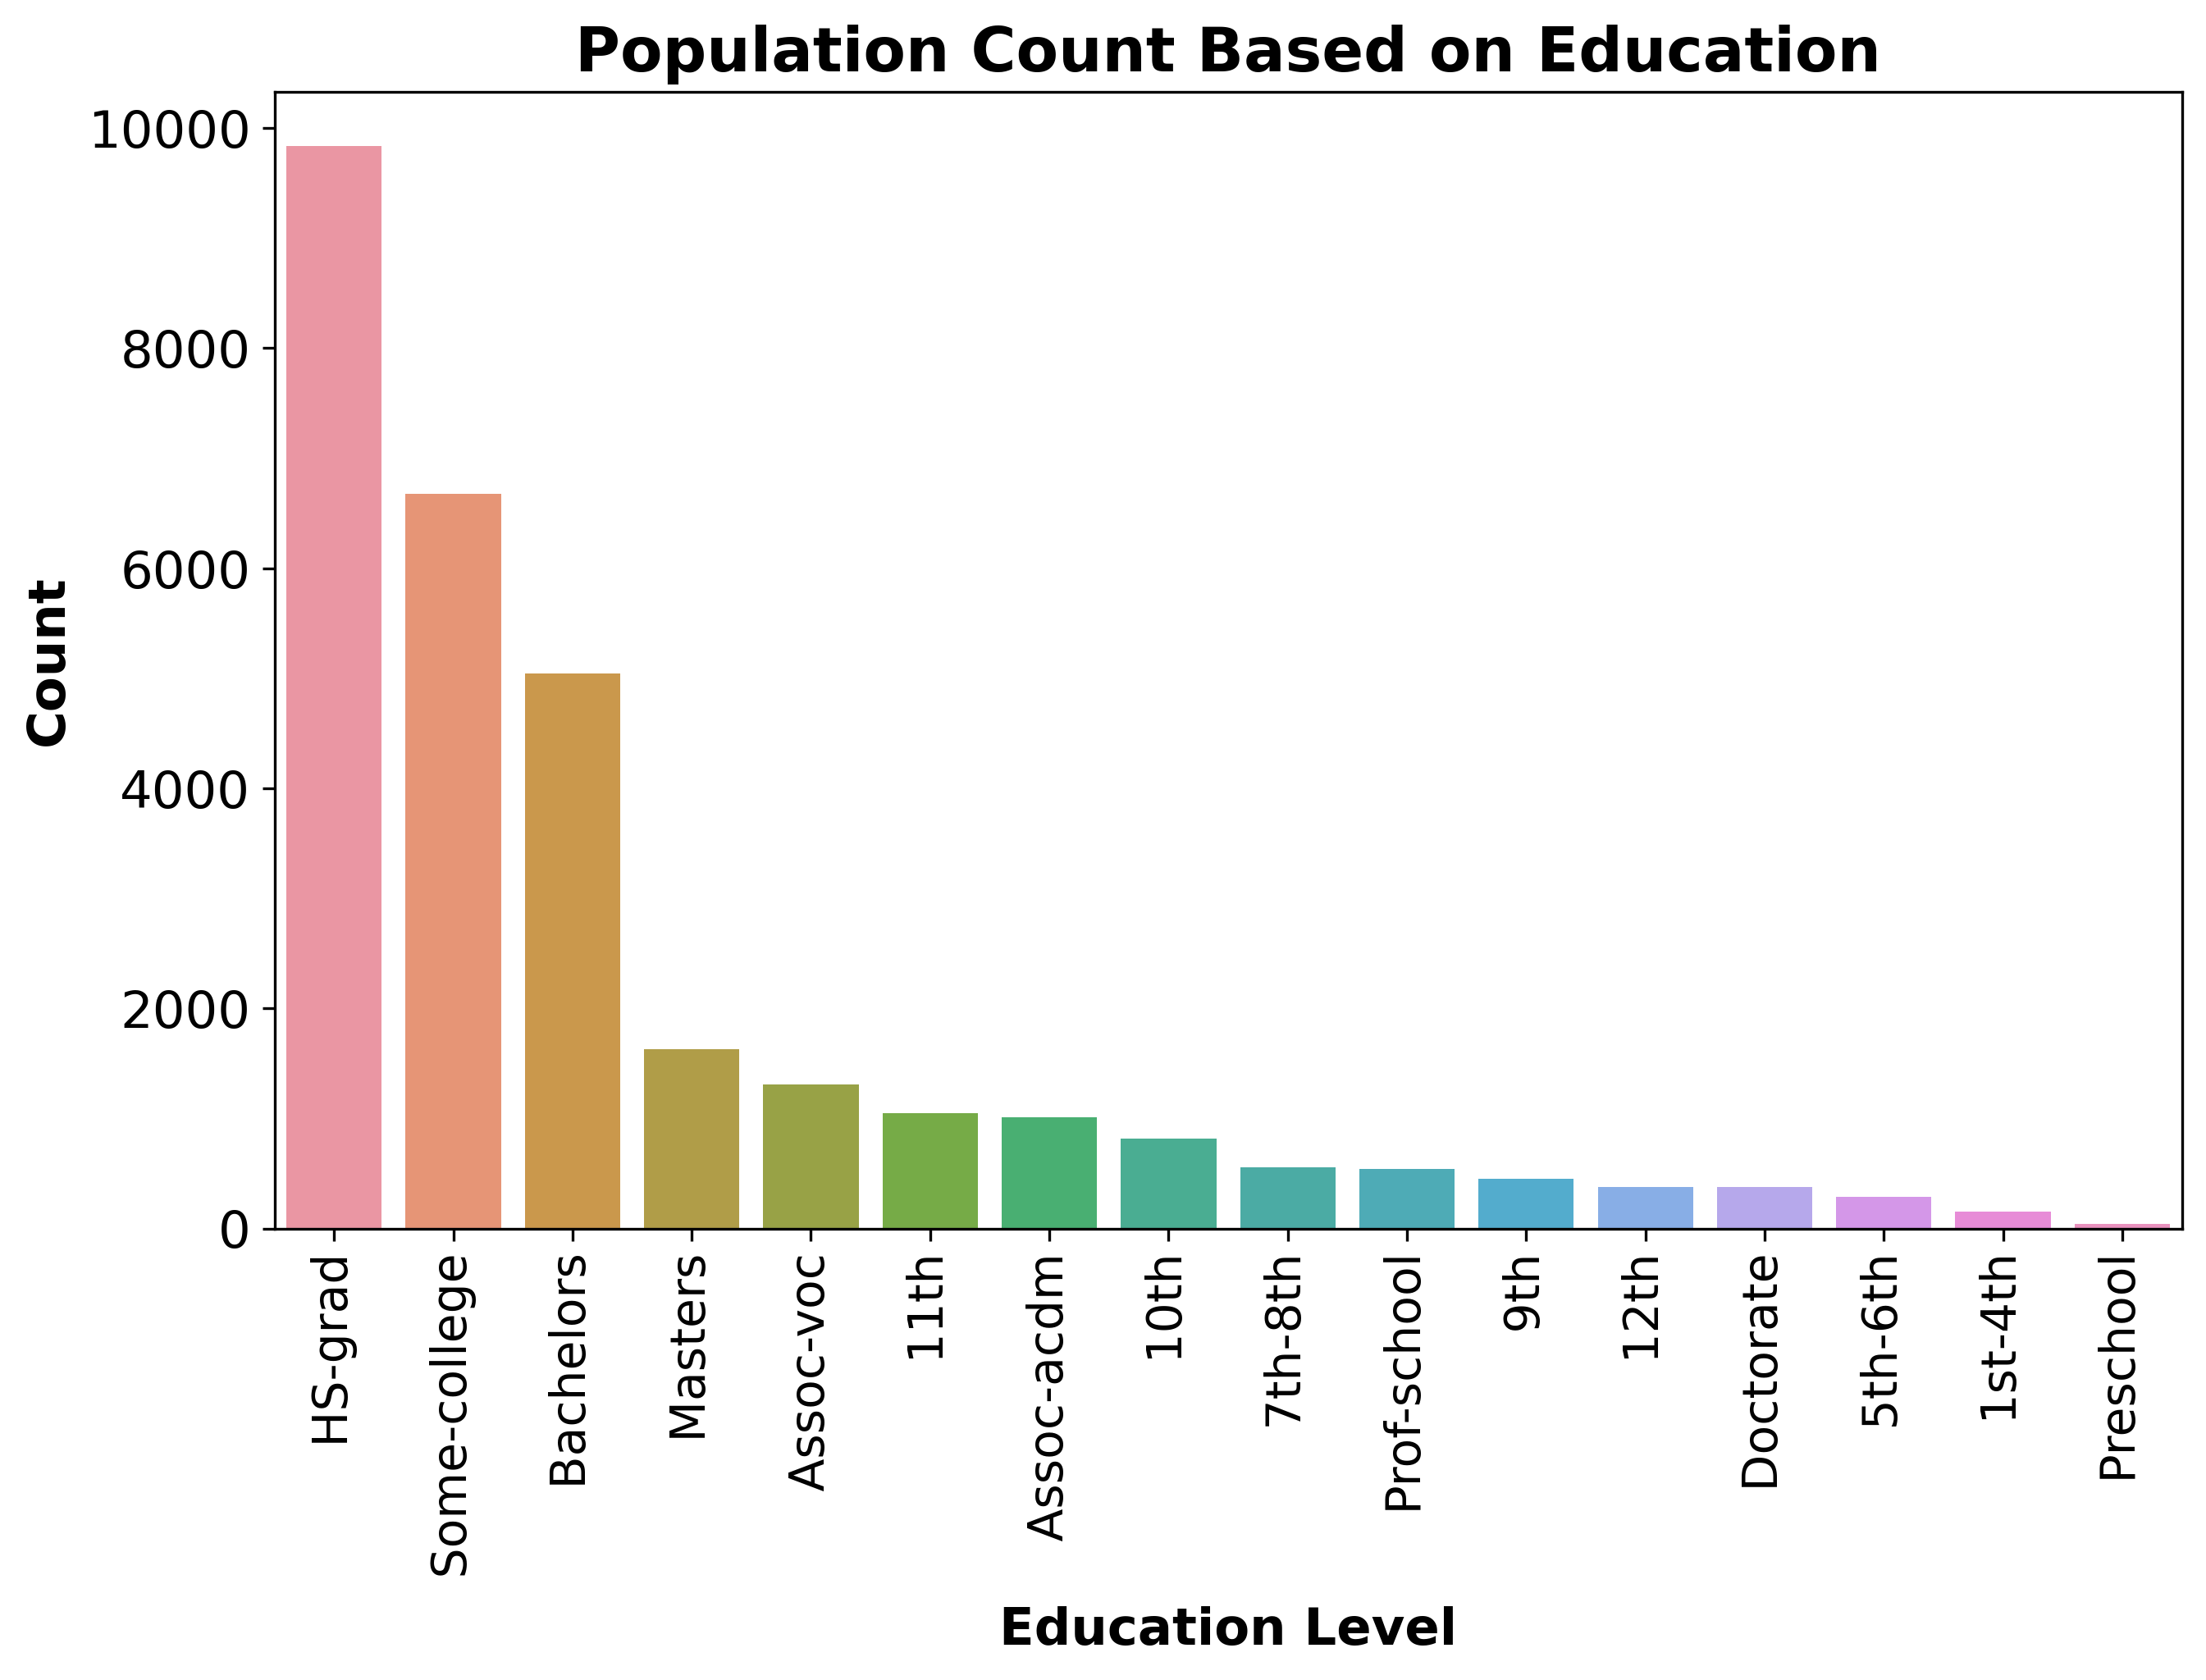

In [56]:
plt.figure(figsize=(10,6), dpi=300)
sns.countplot(x='education', data=df, order= df["education"].value_counts().index)
plt.xlabel("Education Level", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight= "bold")
plt.xticks(rotation="vertical", fontsize= 14)
plt.yticks(fontsize=15)
#plt.legend(bbox_to_anchor=(1,1), fontsize=14)
plt.title("Population Count Based on Education", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('survive1.png', dpi=300)

It shows the the count of higher secondary passed population is significantly higher, and then college passed and Bachelor. It shows that there are very few working people who have not passed even higher secondary education level.

Text(0.5, 1.0, 'Visualize Income Based on Education Degree')

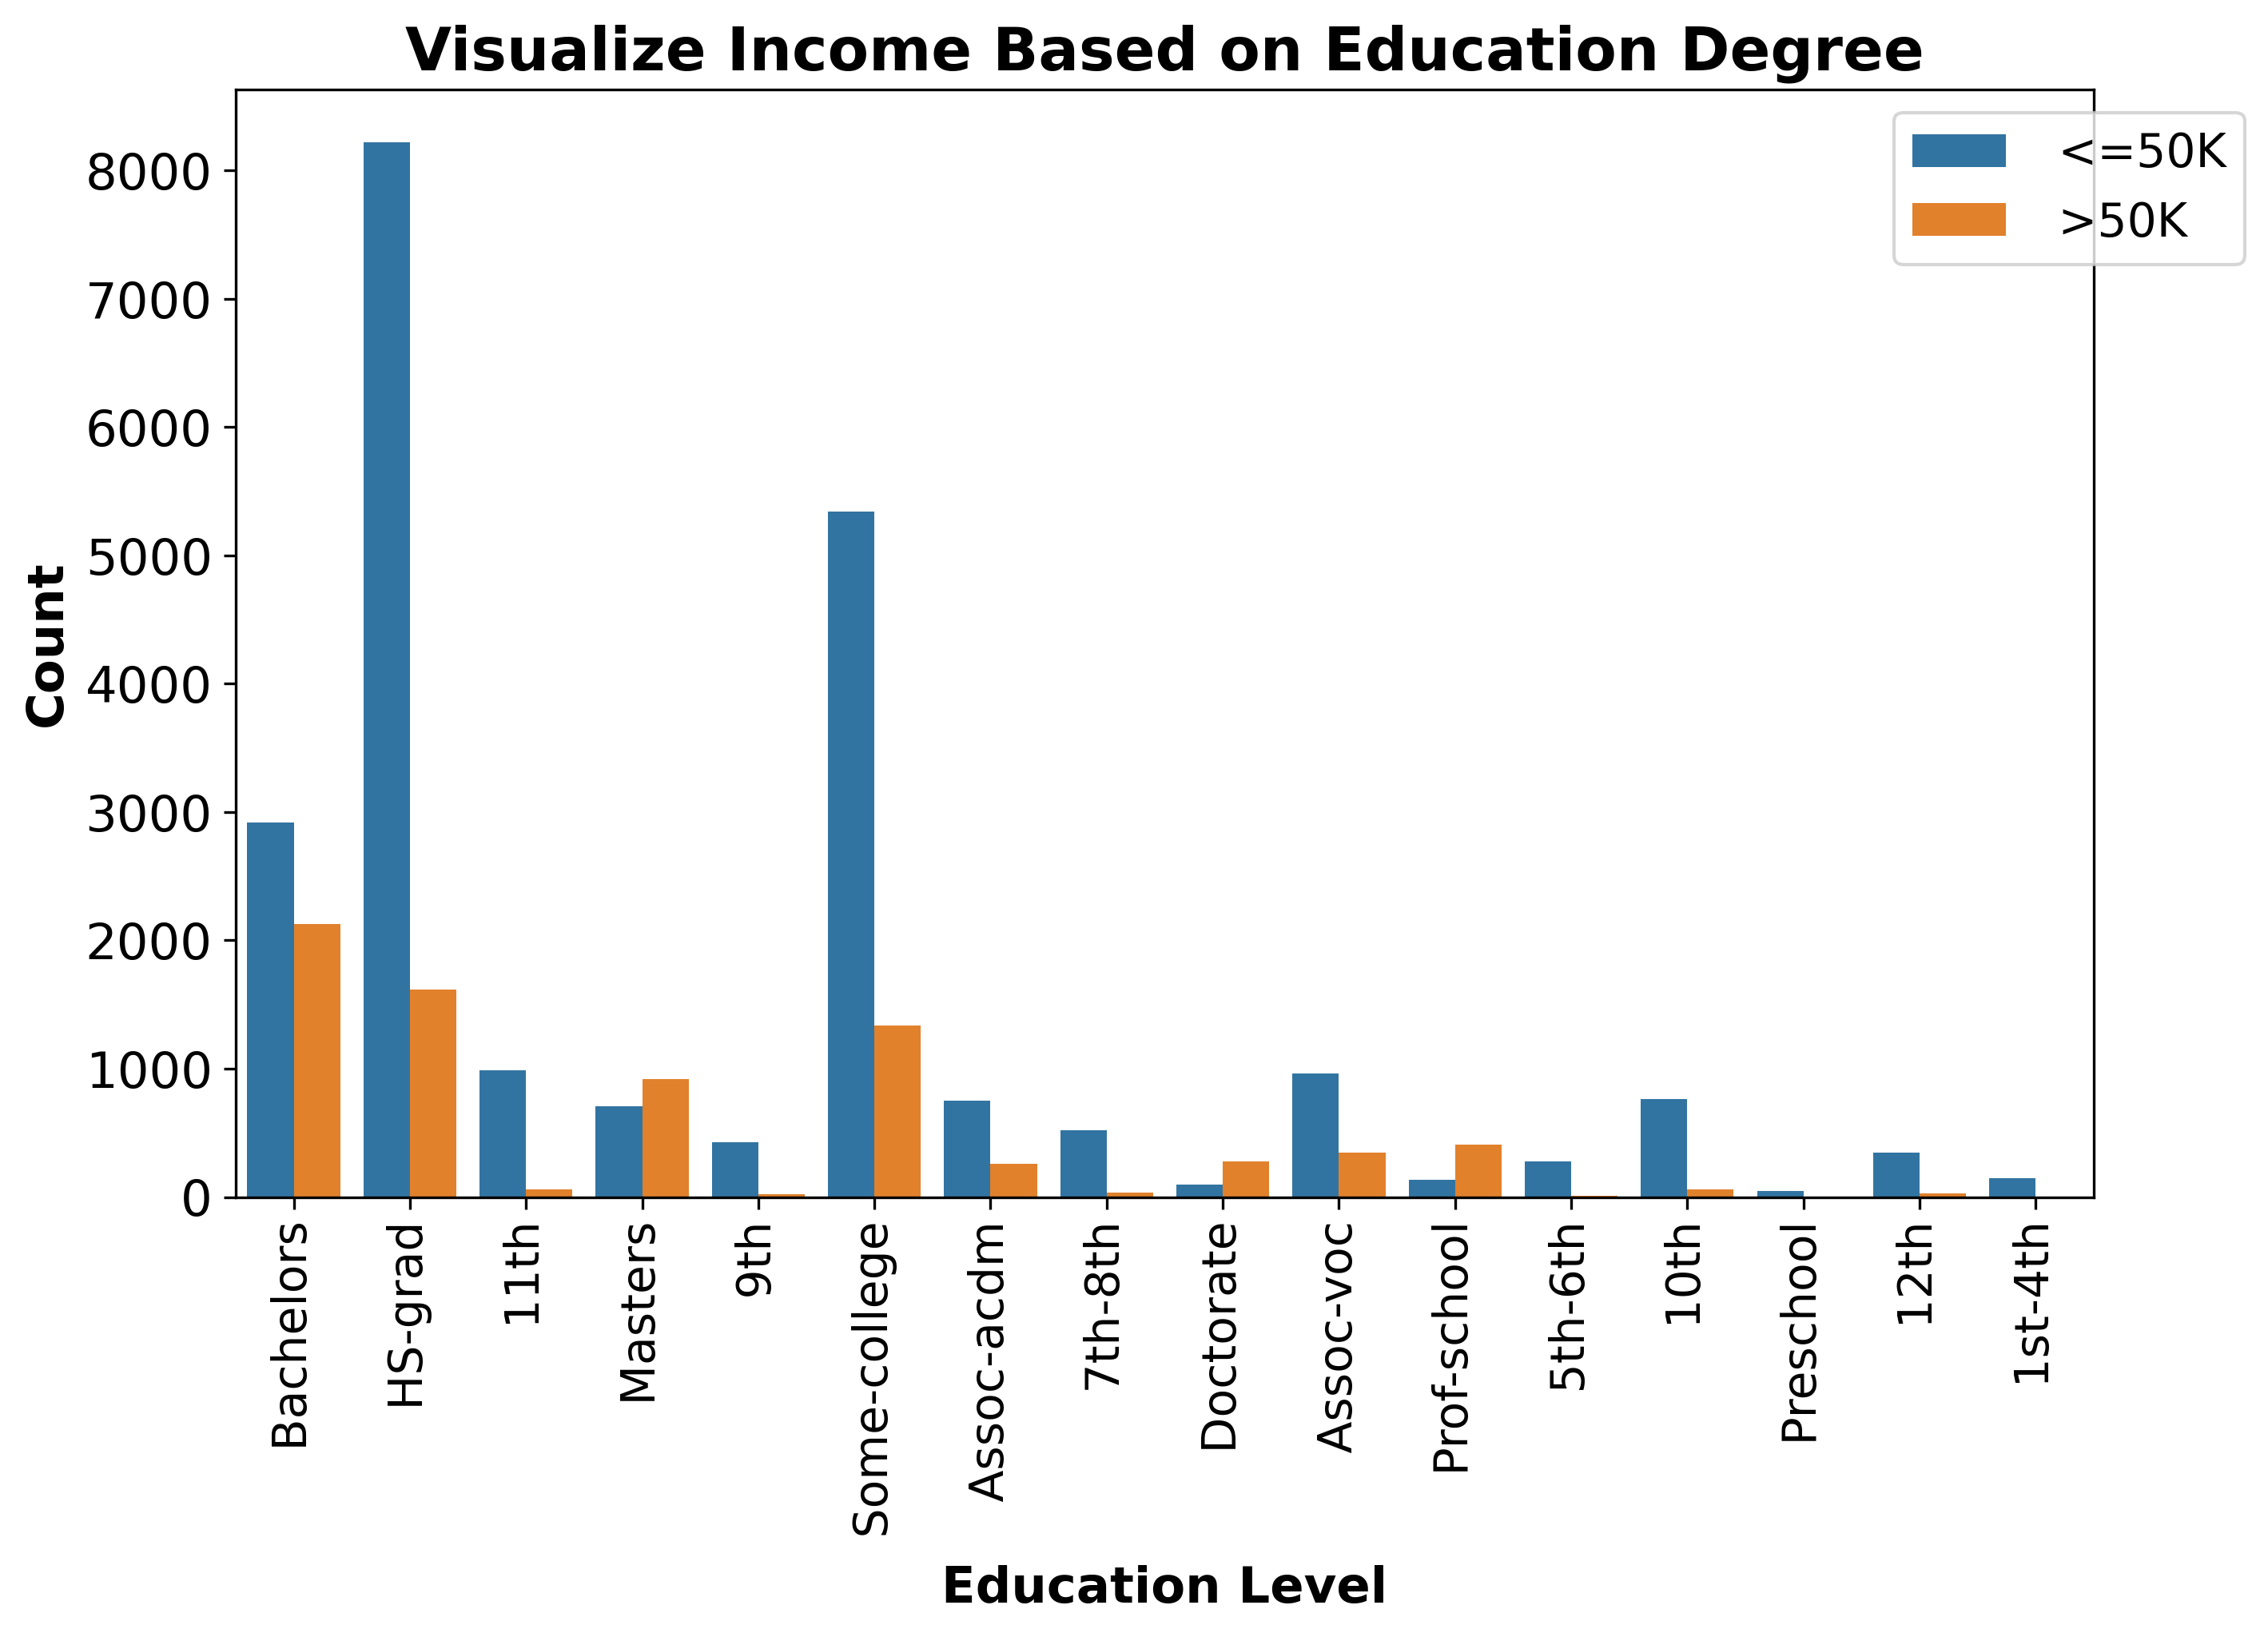

In [57]:
plt.figure(figsize=(10,6),dpi=300)
sns.countplot(x='education', data=df, hue="income")
plt.xlabel("Education Level", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight= "bold")
plt.xticks(rotation="vertical", fontsize= 14)
plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(0.88,1), fontsize=14)
plt.title("Visualize Income Based on Education Degree", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('survive1.png', dpi=300)

The employee who have passed only college level or lower generally work on < 50K wages. However, Masters, Professors, Doctorate degree holders earn more than 50K. 

##### Based on Marital Status

Text(0.5, 1.0, 'Relation of Income with Marital Status')

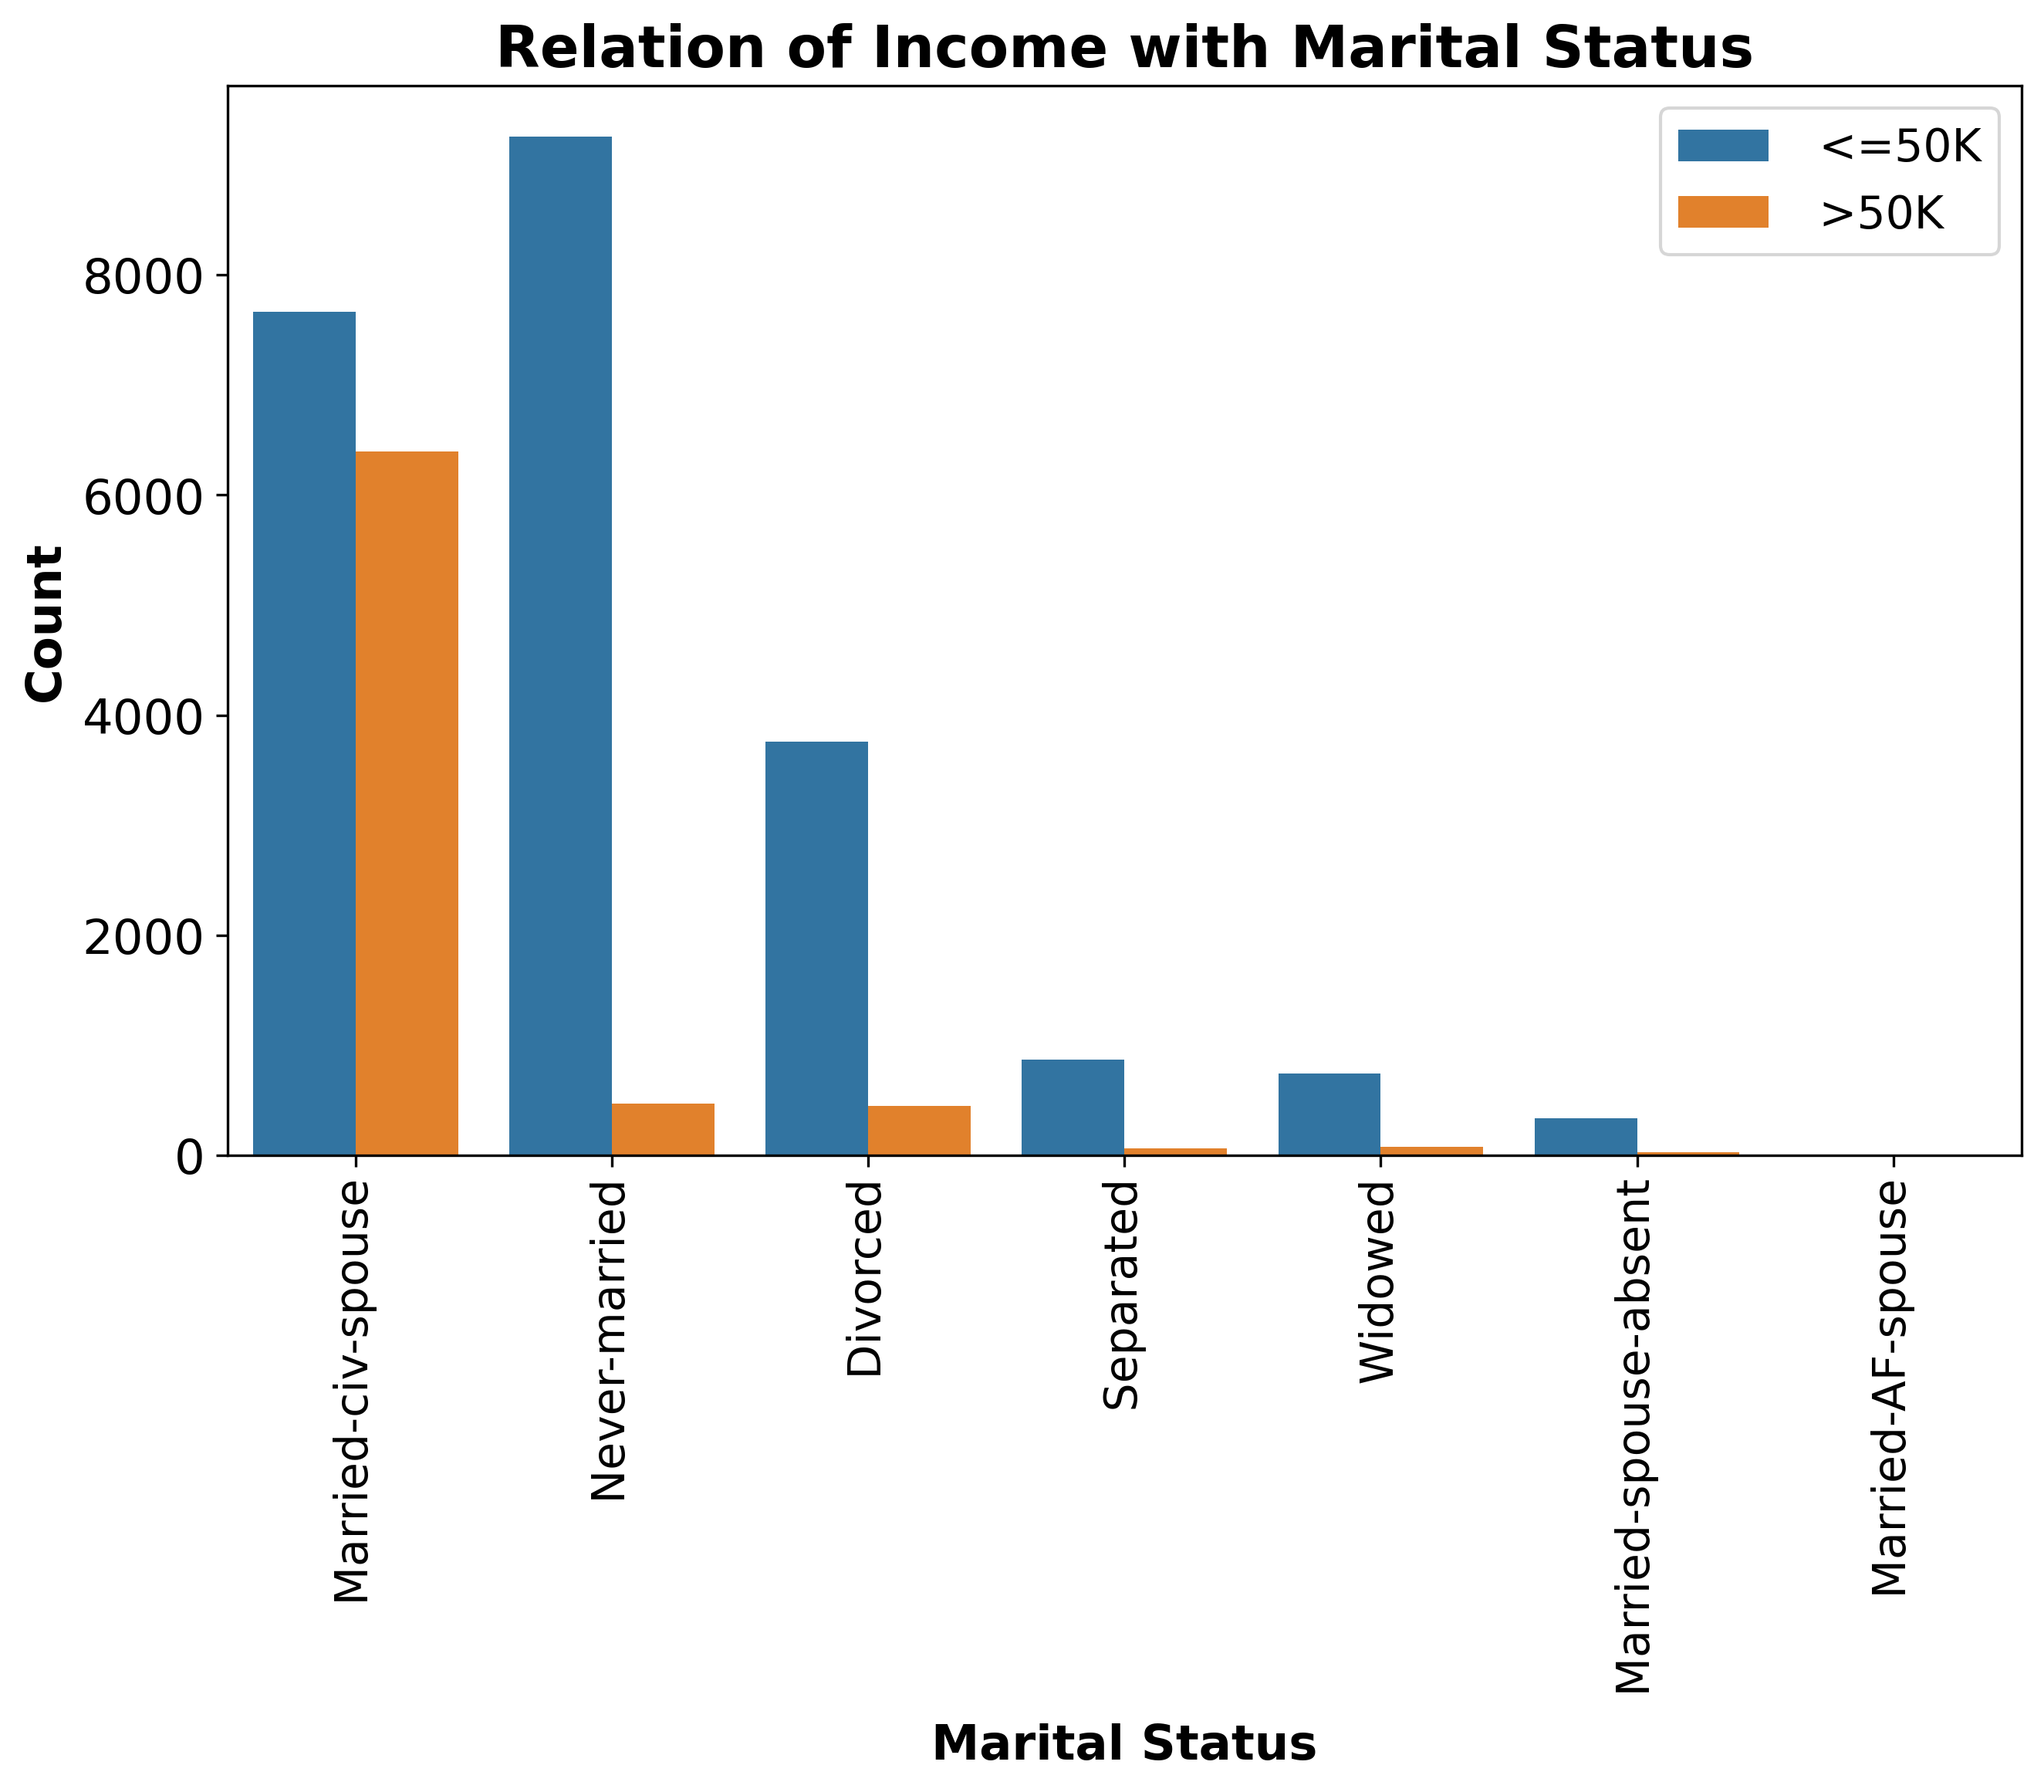

In [58]:
plt.figure(figsize=(10,6), dpi=300)
sns.countplot(x='marital_status', data=df, hue='income', order= df["marital_status"].value_counts().index)
plt.xlabel("Marital Status", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight= "bold")
plt.xticks(rotation="vertical", fontsize= 14)
plt.yticks(fontsize=15)
plt.legend(loc="upper right", fontsize=14)
plt.title("Relation of Income with Marital Status", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('survive1.png', dpi=300)

The number of married-spouse is significantly more than others and they have good source of income. There is about equal number of people out of married-spouse, work for wages less and more than 50 K. Other class of people just work for survival even at low wages.

##### Based on Sex

Text(0.5, 1.0, 'Income Based on Sex')

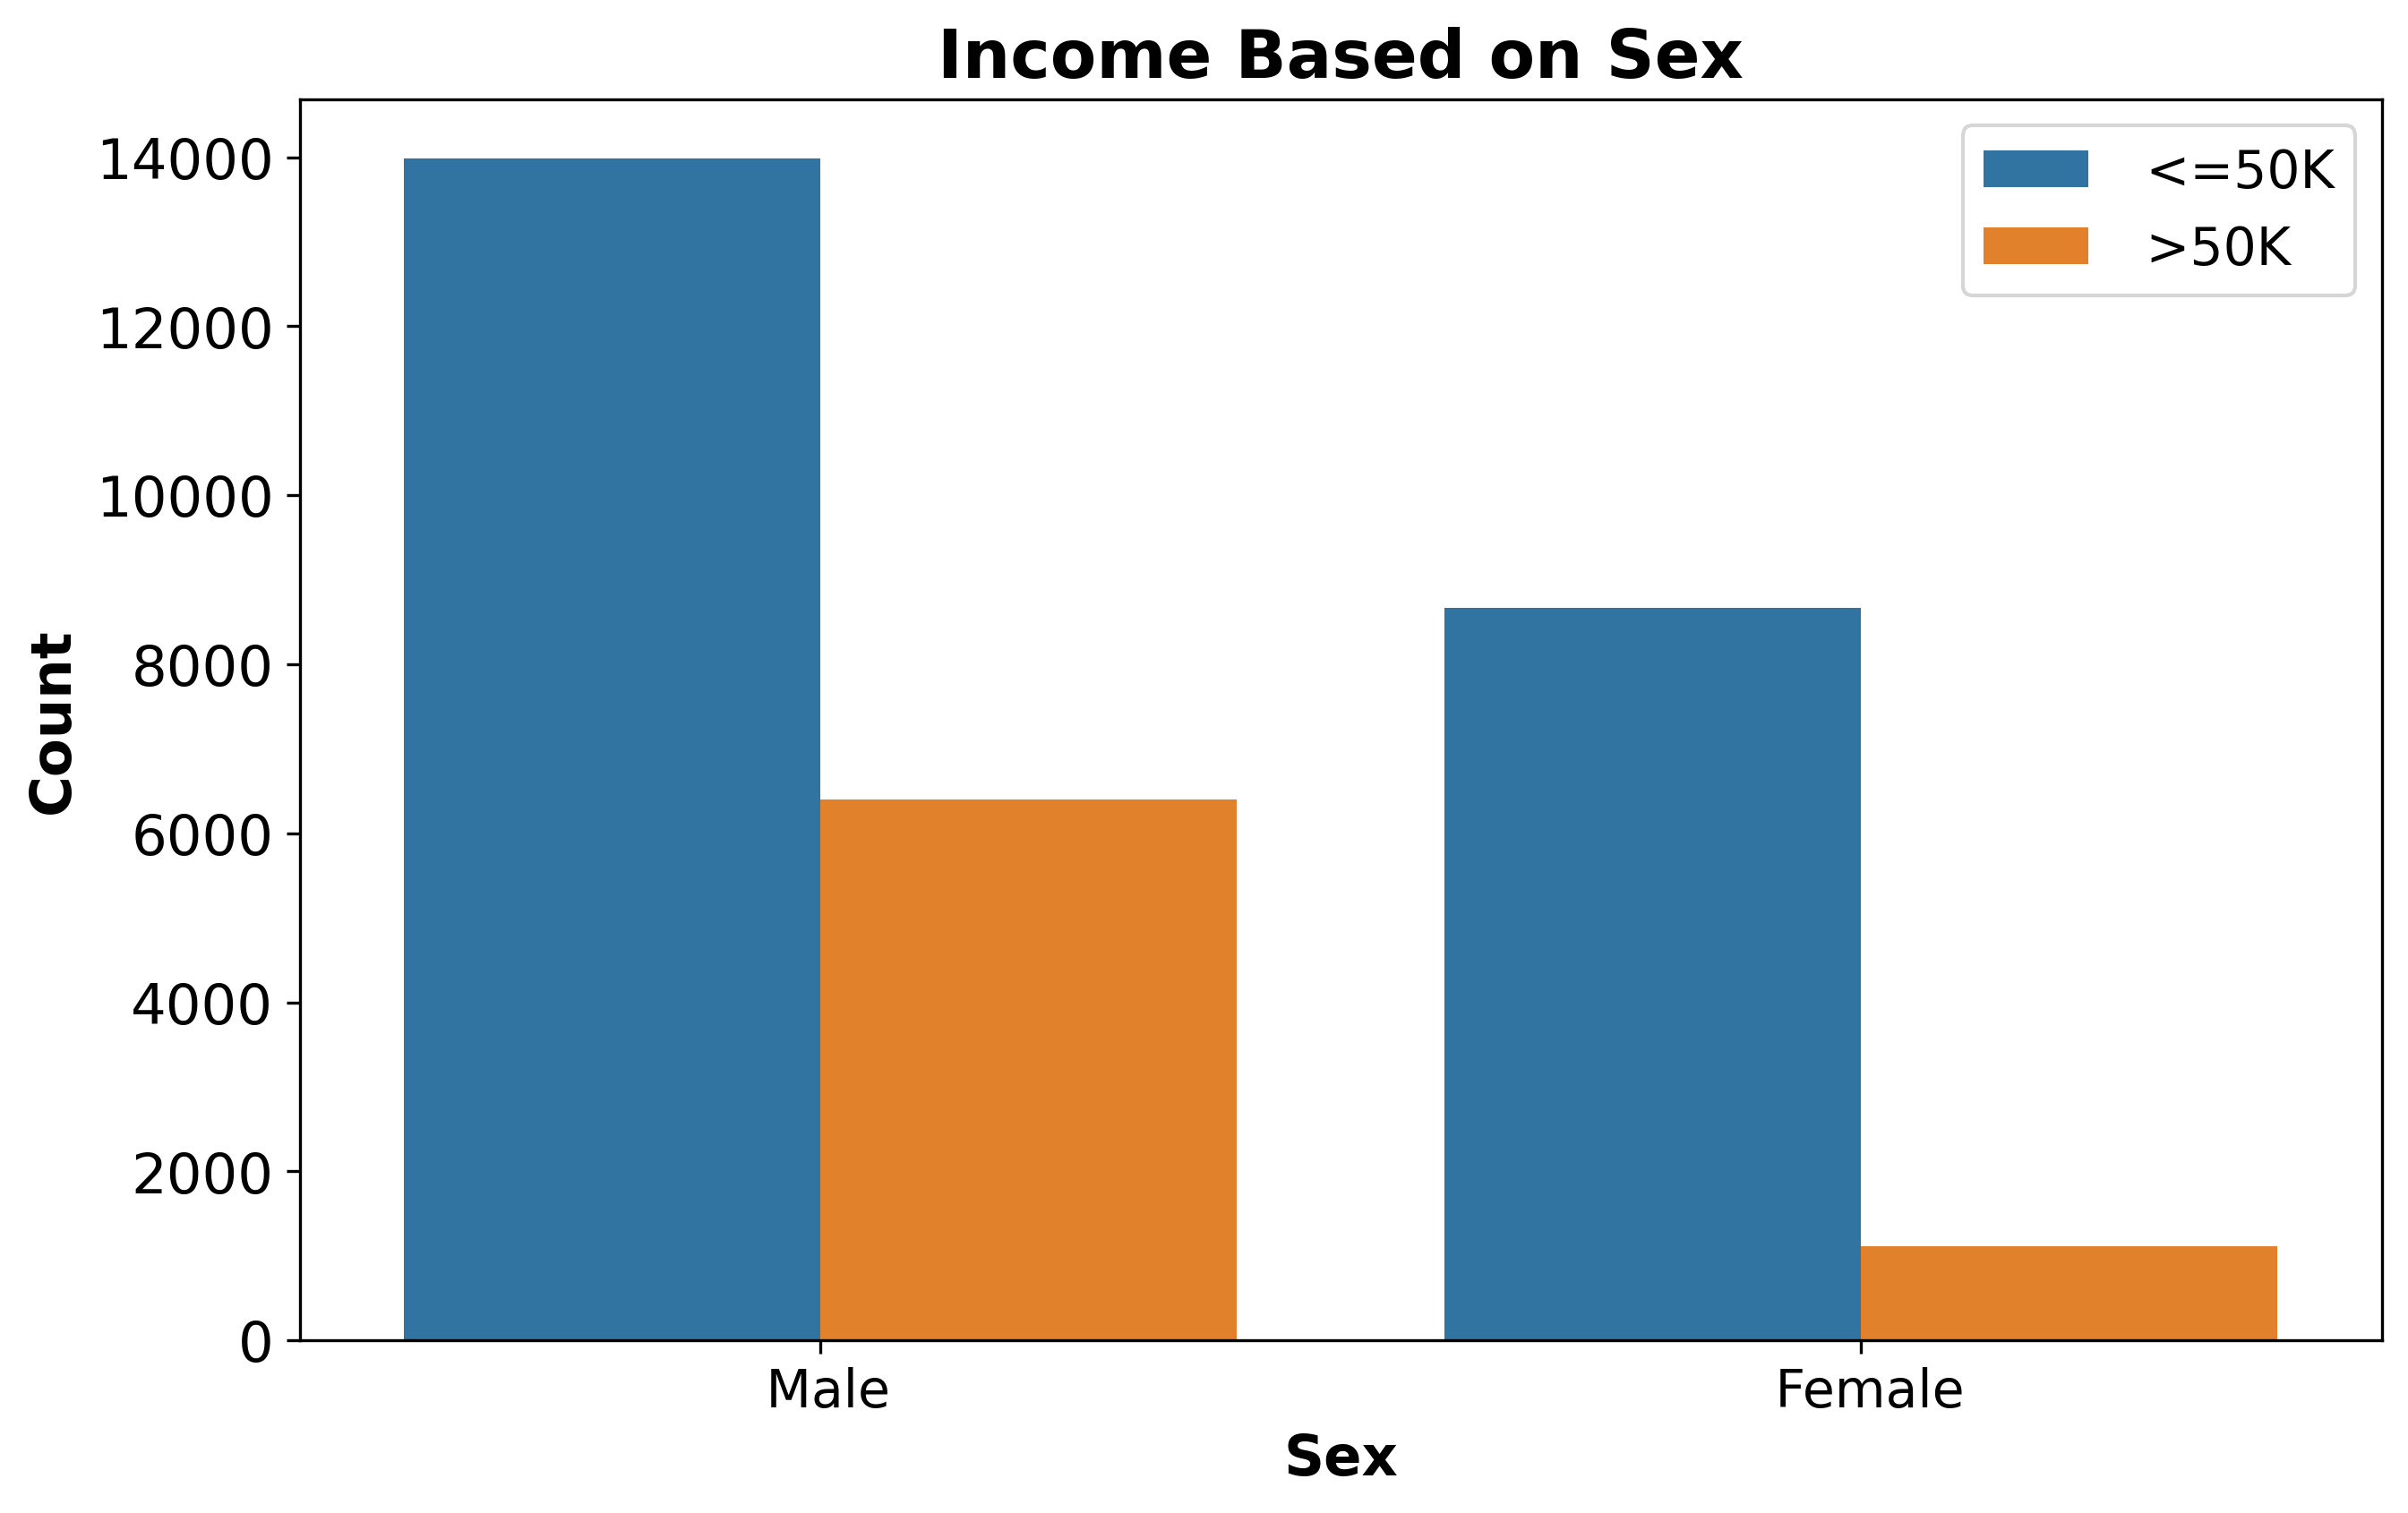

In [59]:
plt.figure(figsize=(10,6), dpi=300)
sns.countplot(x='sex', data=df, hue='income')
plt.xlabel("Sex", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight= "bold")
plt.xticks(fontsize= 14)
plt.yticks(fontsize=15)
plt.legend(loc="upper right", fontsize=14)
plt.title("Income Based on Sex", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('survive1.png', dpi=300)

The number of male workers is almost double of female workers.

In [254]:
male_worker= df[df["sex"]== " Male"]['age'].count()
female_worker= df[df["sex"]== " Female"]['age'].count()
male_less= df[(df["sex"]== " Male") & (df['income']==" <=50K")]['age'].count()
female_less= df[(df["sex"]== " Female") & (df['income']==" <=50K")]['age'].count()


In [262]:
print("Out of total worker, male worker to female worker propertion is: {:.3f}".format(male_worker/female_worker))
print("Out of male worker, {:.3f} % work for wages less than 50K and {:.3f} % work for wages more than 50K".format(male_less*100/male_worker, 100-male_less*100/male_worker))
print("Out of female worker, {:.3f} % work for wages less than 50K and {:.3f} % work for wages more than 50K".format(female_less*100/female_worker, 100-female_less*100/female_worker))



Out of total worker, male worker to female worker propertion is: 2.083
Out of male worker, 68.615 % work for wages less than 50K and 31.385 % work for wages more than 50K
Out of female worker, 88.632 % work for wages less than 50K and 11.368 % work for wages more than 50K


##### Based on Occupation

Text(0.5, 1.0, 'Population Count Based on Occupation')

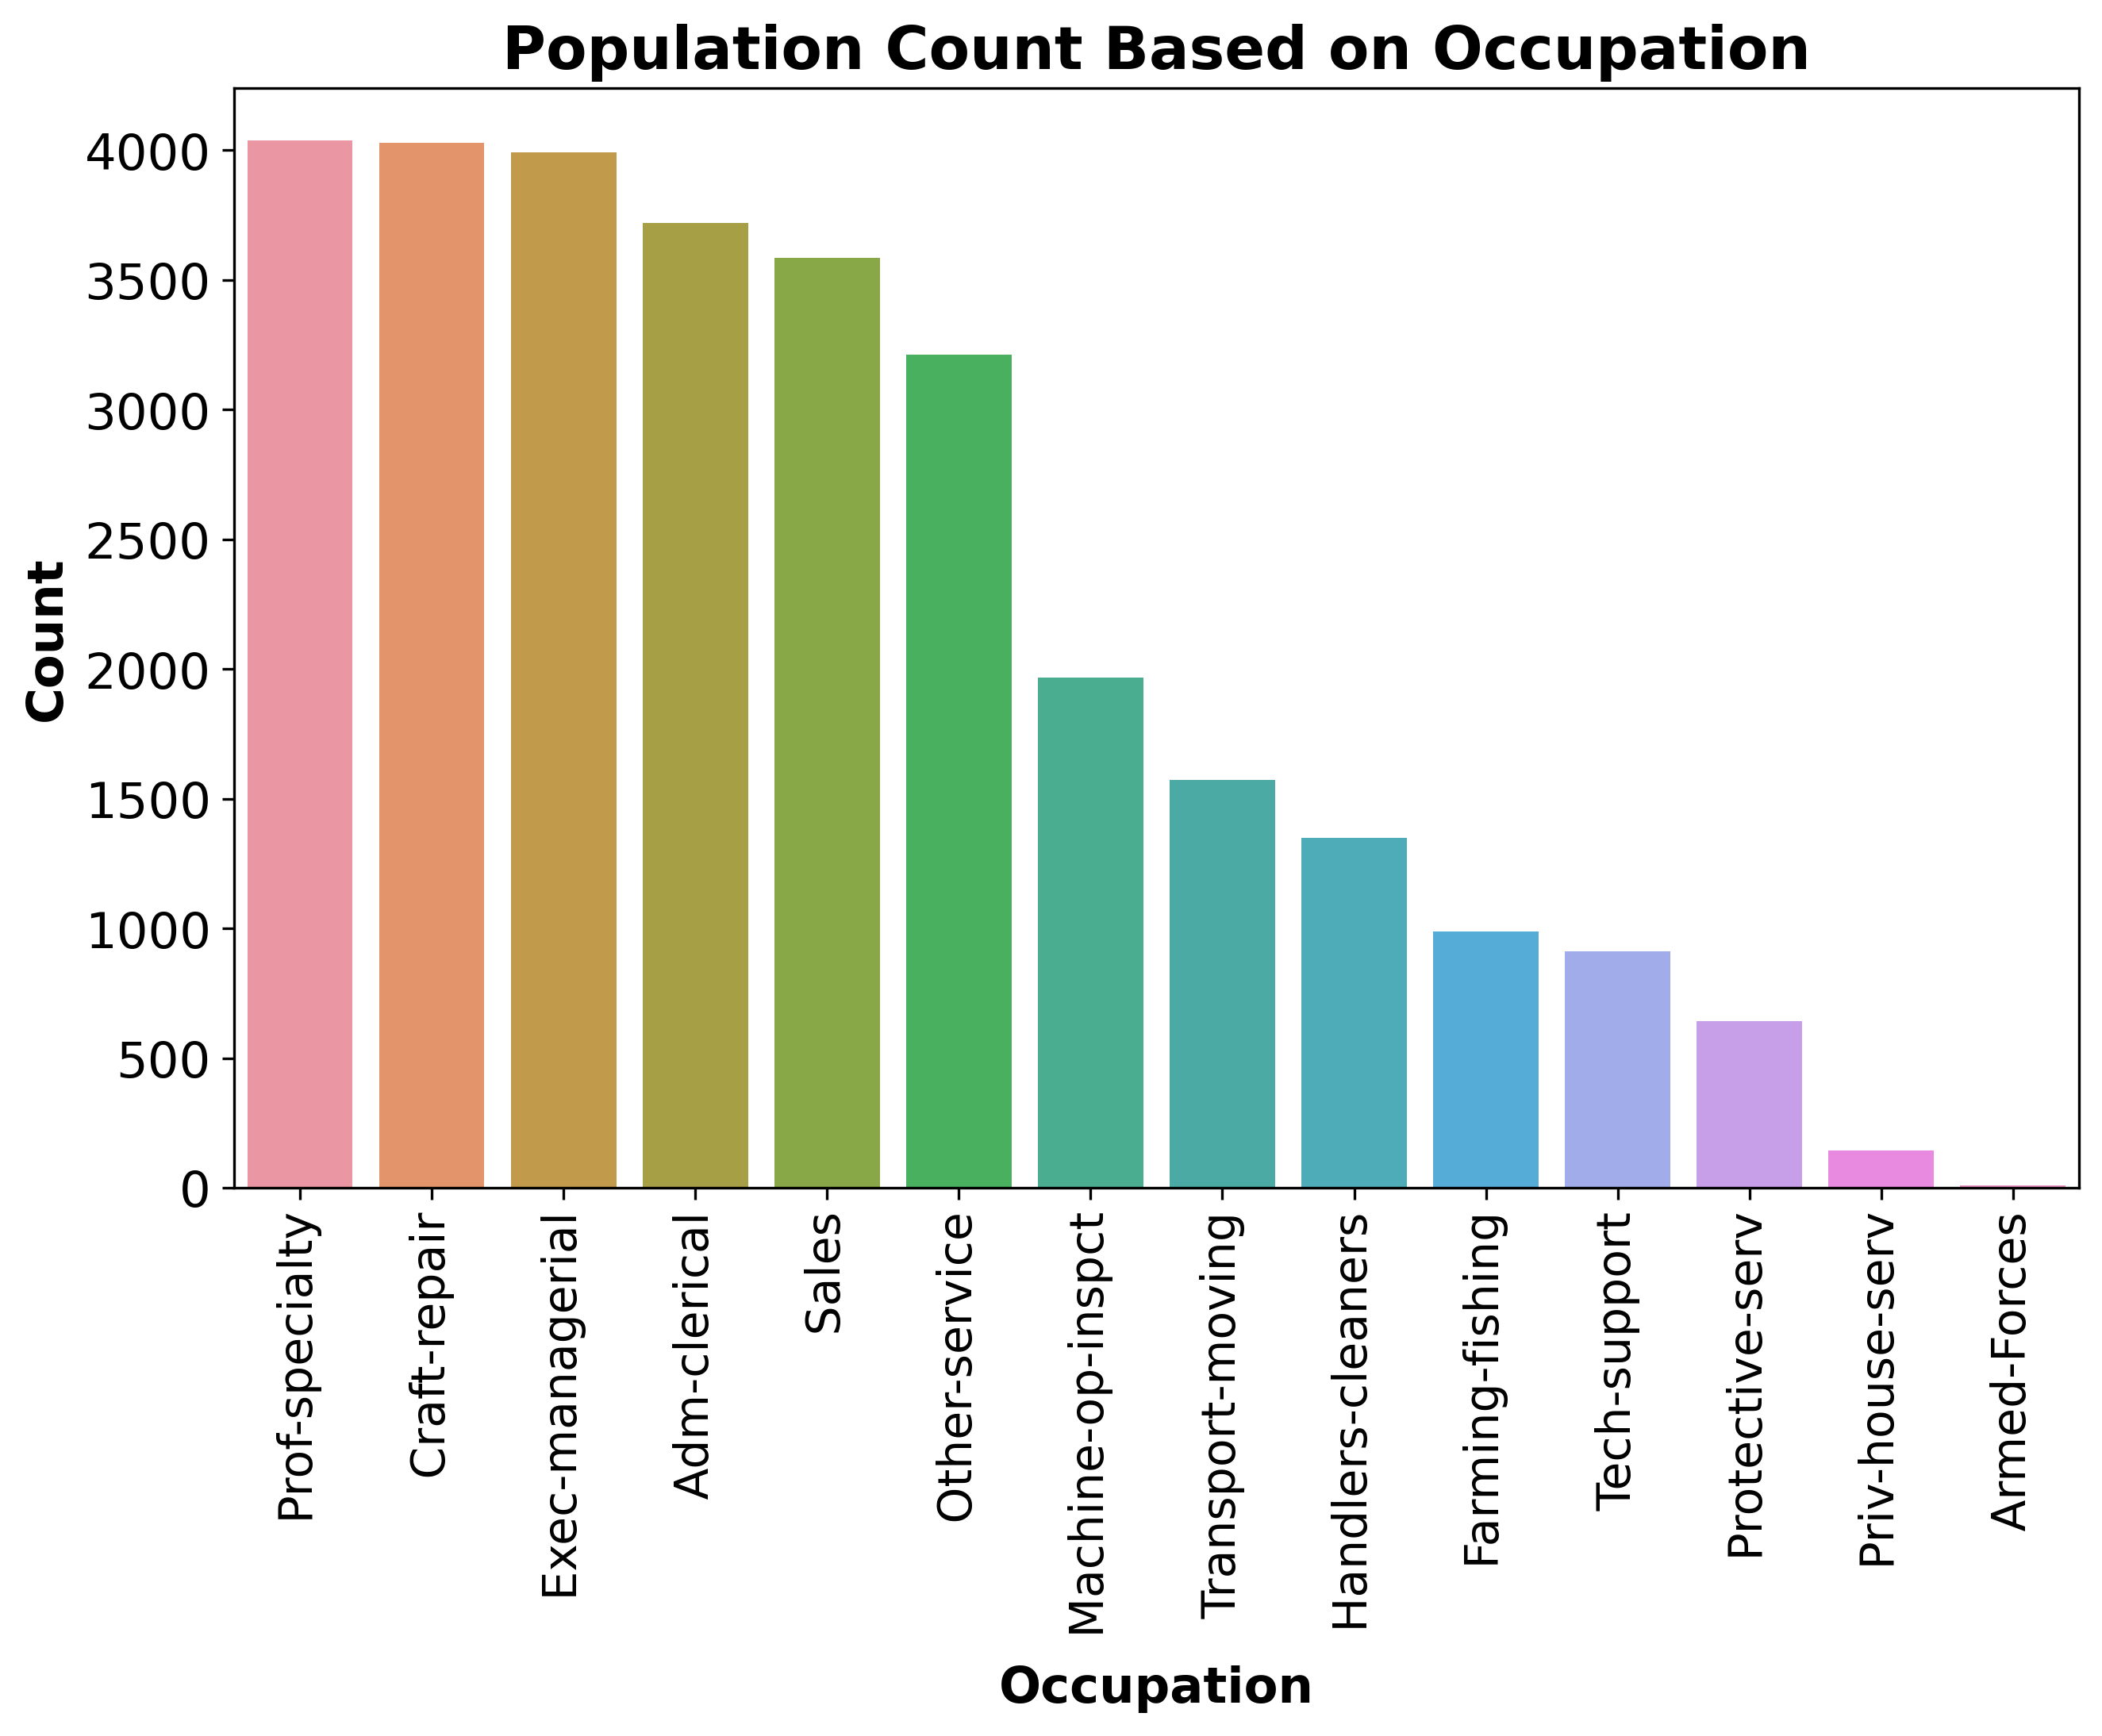

In [60]:
plt.figure(figsize=(10,6), dpi=300)
sns.countplot(x='occupation', data=df, order= df["occupation"].value_counts().index)
plt.xlabel("Occupation", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight= "bold")
plt.xticks(rotation="vertical", fontsize= 14)
plt.yticks(fontsize=15)
#plt.legend(bbox_to_anchor=(1,1), fontsize=14)
plt.title("Population Count Based on Occupation", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('survive1.png', dpi=300)

It shows that the most of the workers are interested in prof-speciality, craft-repai, executive-managerial, adm-clerical and sales. Contradictorilly, very less people go for armed forces.

Text(0.5, 1.0, 'Income Based on Occupation')

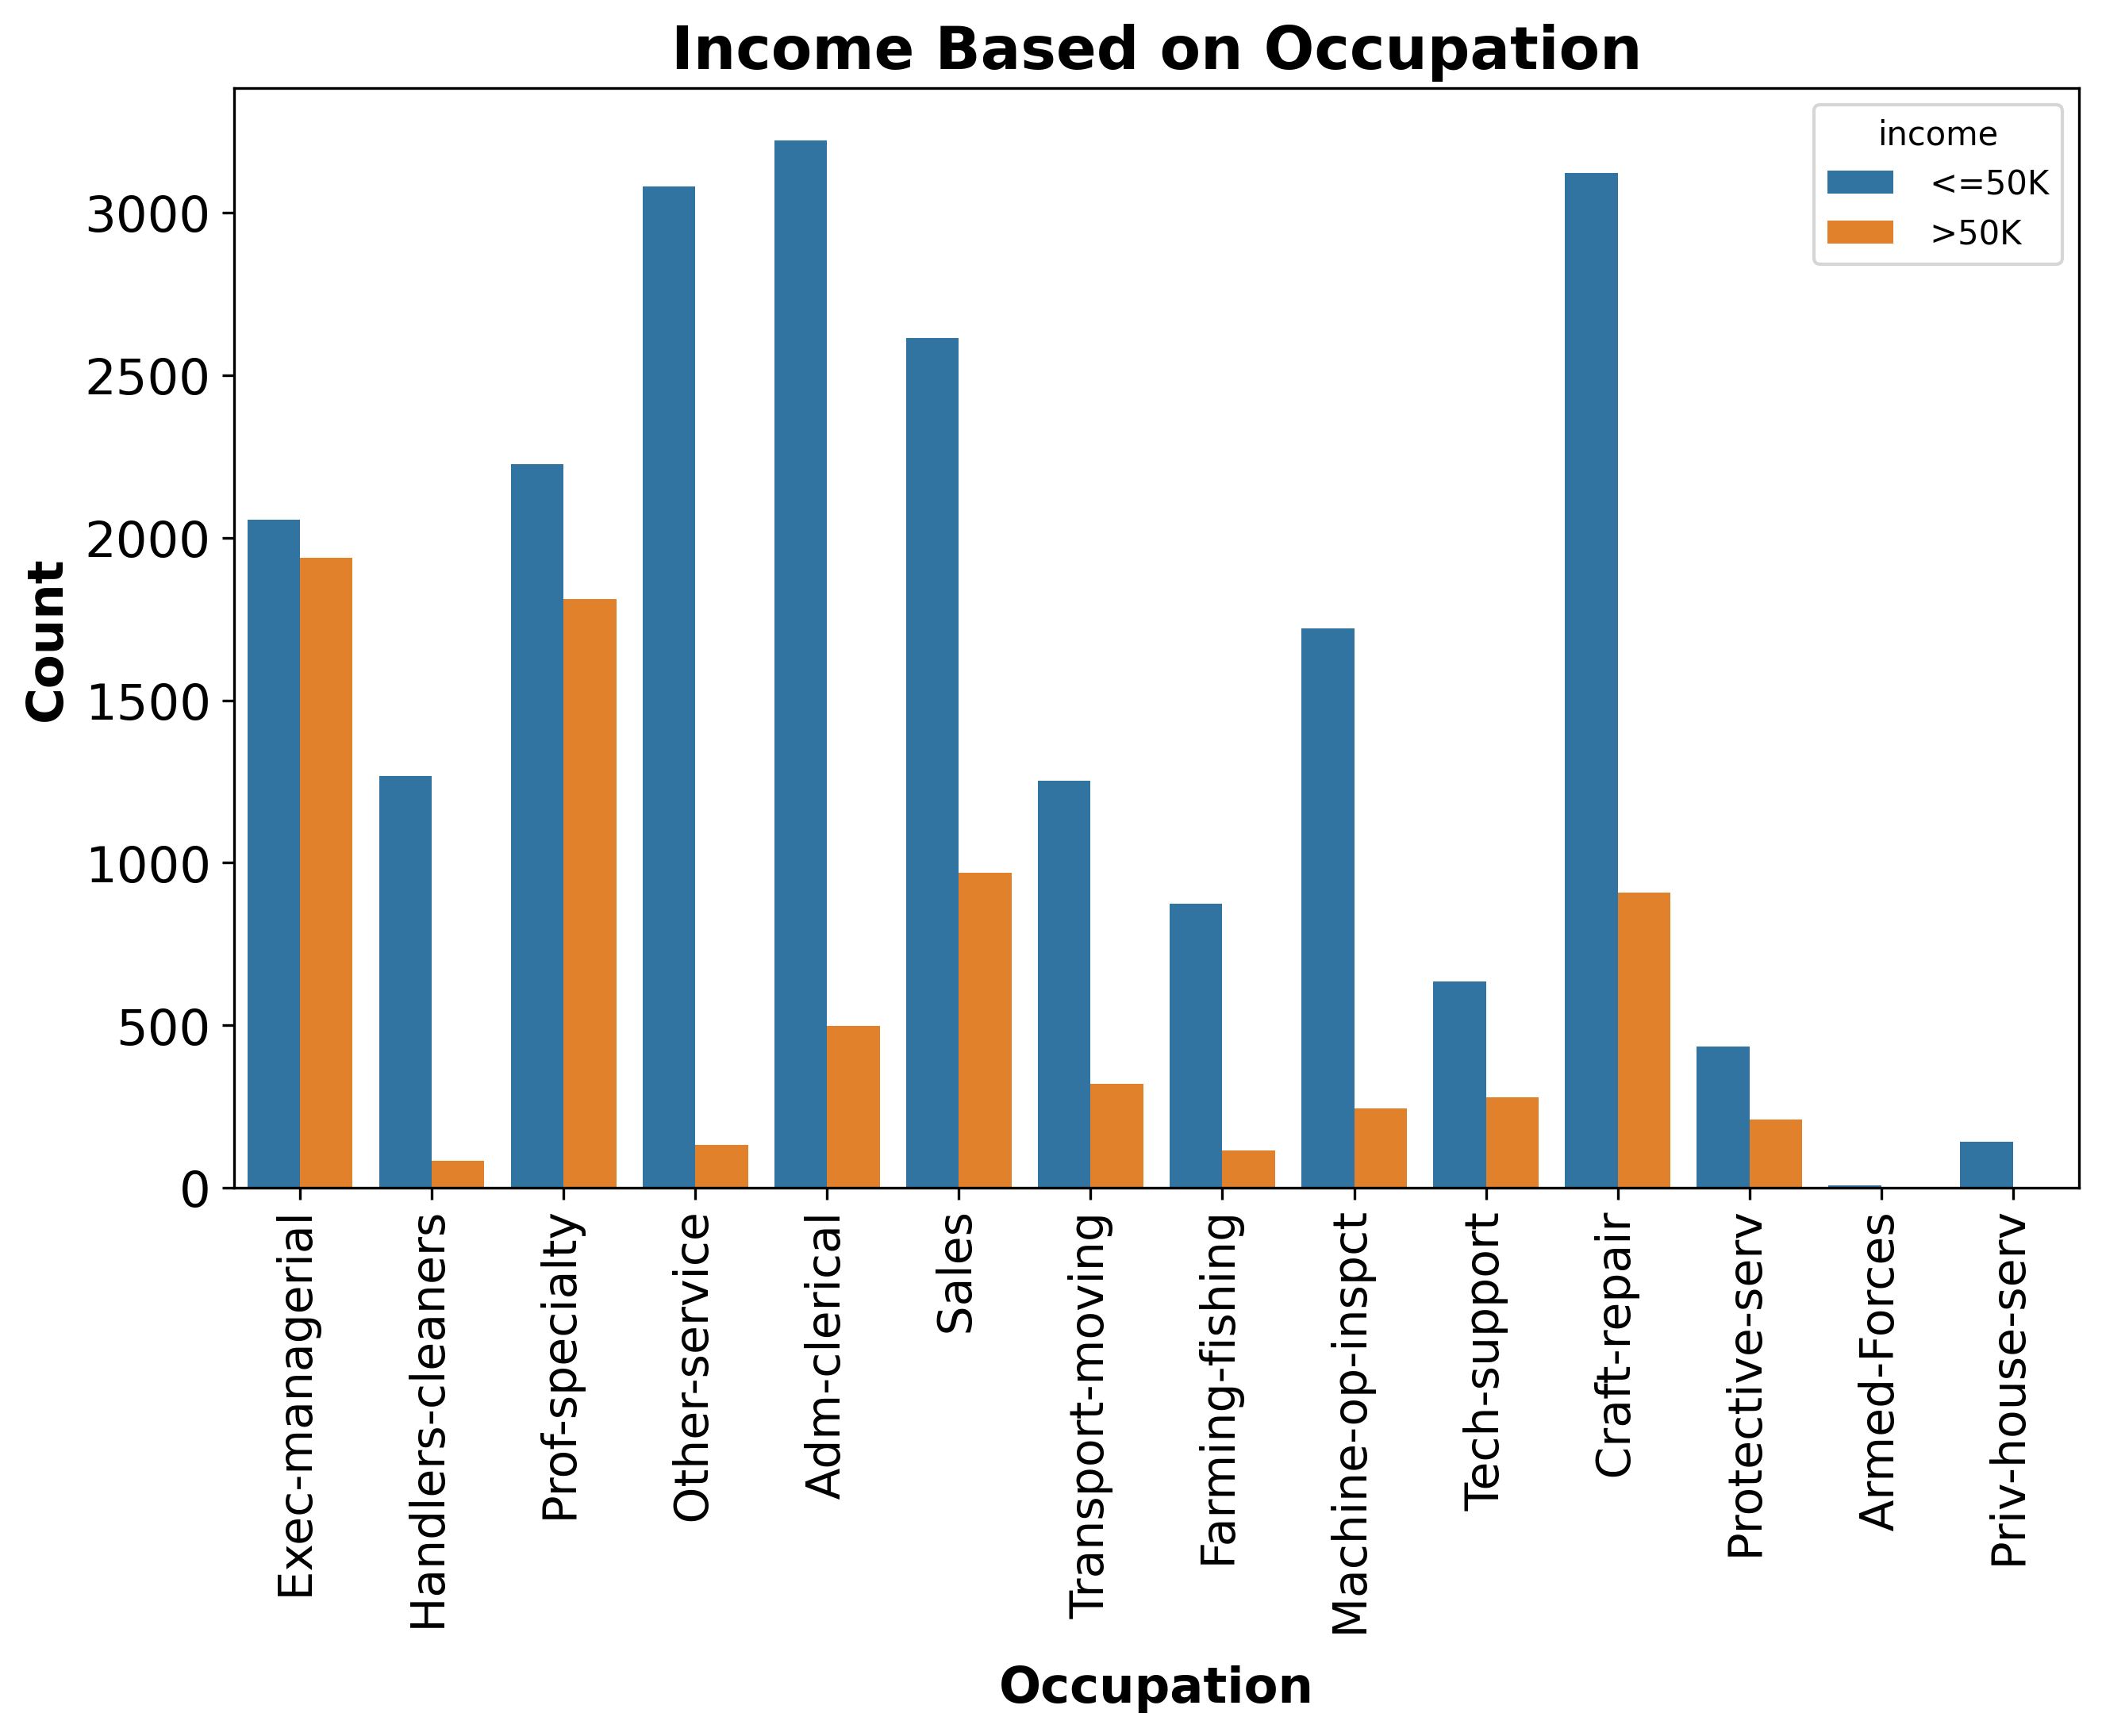

In [61]:
plt.figure(figsize=(10,6), dpi=300)
sns.countplot(x='occupation', data=df, hue= 'income')
plt.xlabel("Occupation", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight= "bold")
plt.xticks(rotation="vertical", fontsize= 14)
plt.yticks(fontsize=15)
#plt.legend(bbox_to_anchor=(1,1), fontsize=14)
plt.title("Income Based on Occupation", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('survive1.png', dpi=300)

Text(0.5, 1.0, 'Occupation VS Sex')

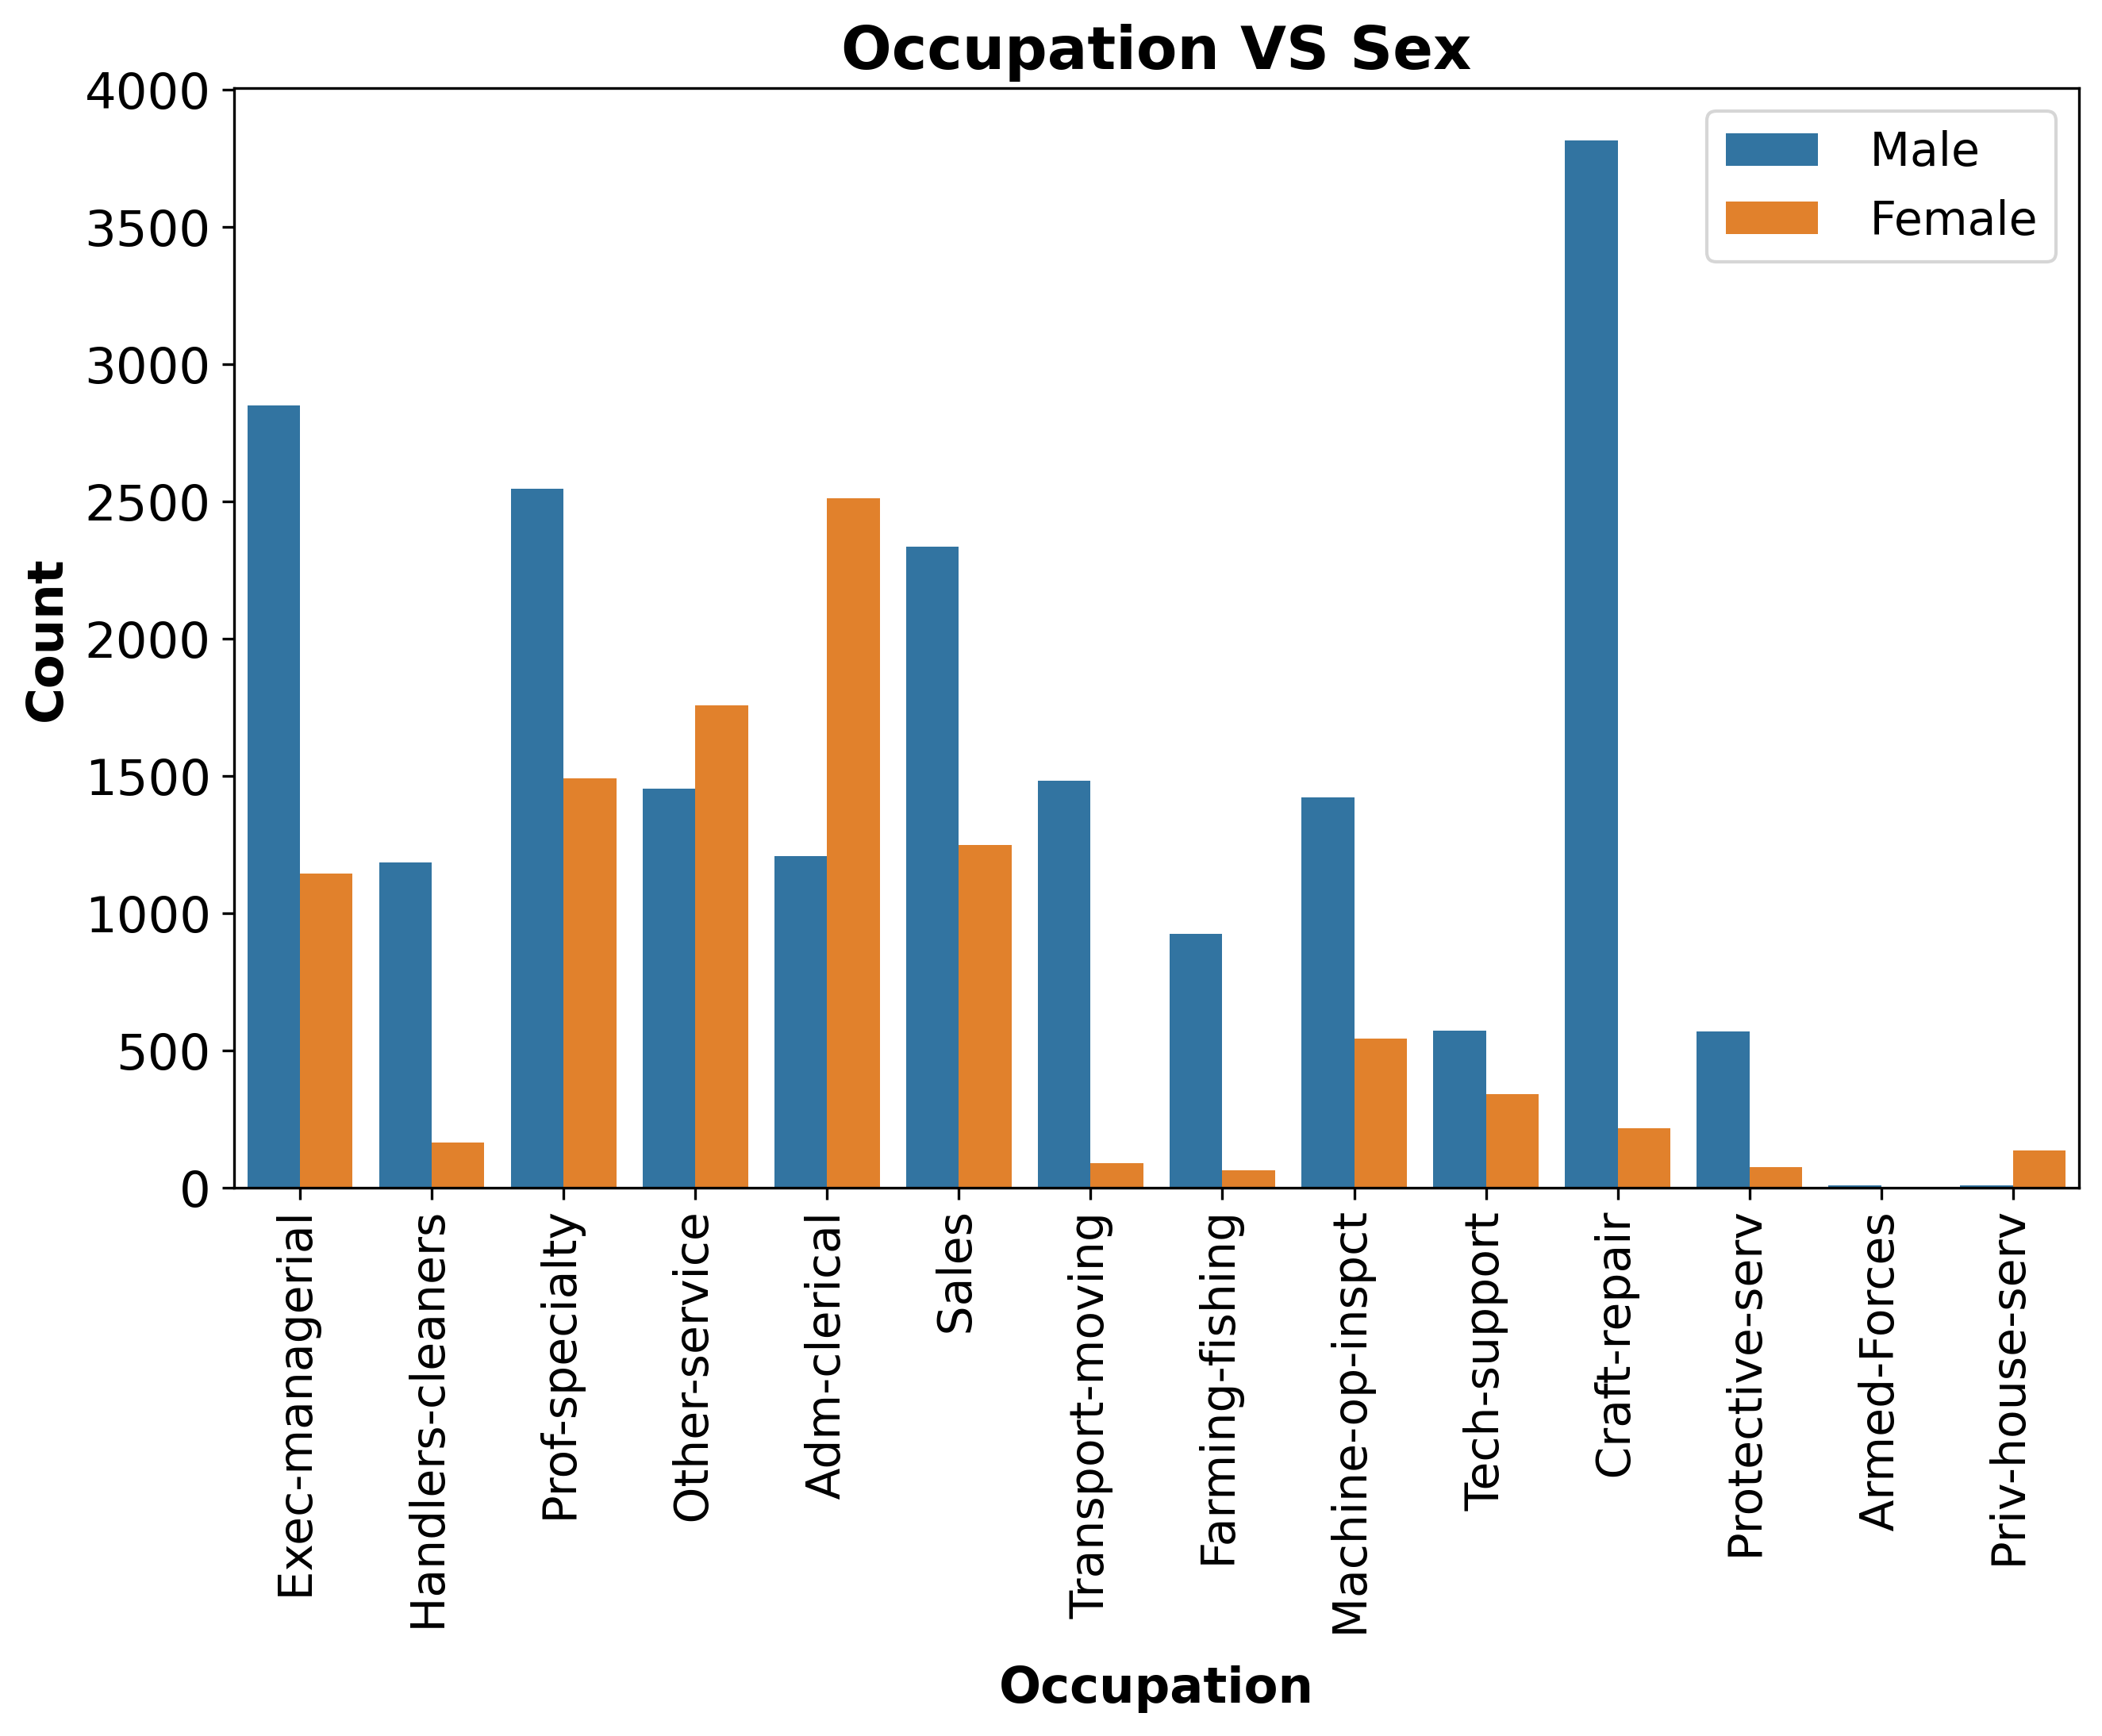

In [62]:
plt.figure(figsize=(10,6), dpi=300)
sns.countplot(x='occupation', data=df, hue= 'sex')
plt.xlabel("Occupation", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight= "bold")
plt.xticks(rotation="vertical", fontsize= 14)
plt.yticks(fontsize=15)
plt.legend(loc="upper right", fontsize=14)
plt.title("Occupation VS Sex", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('survive1.png', dpi=300)

It shows number of male worker is comparatively higher than female worker. However, there is some profession where number of female worker is more such as adm-clerical and house servicing.

##### Based on Relationship

Text(0.5, 1.0, 'Population Count Based on Relationship')

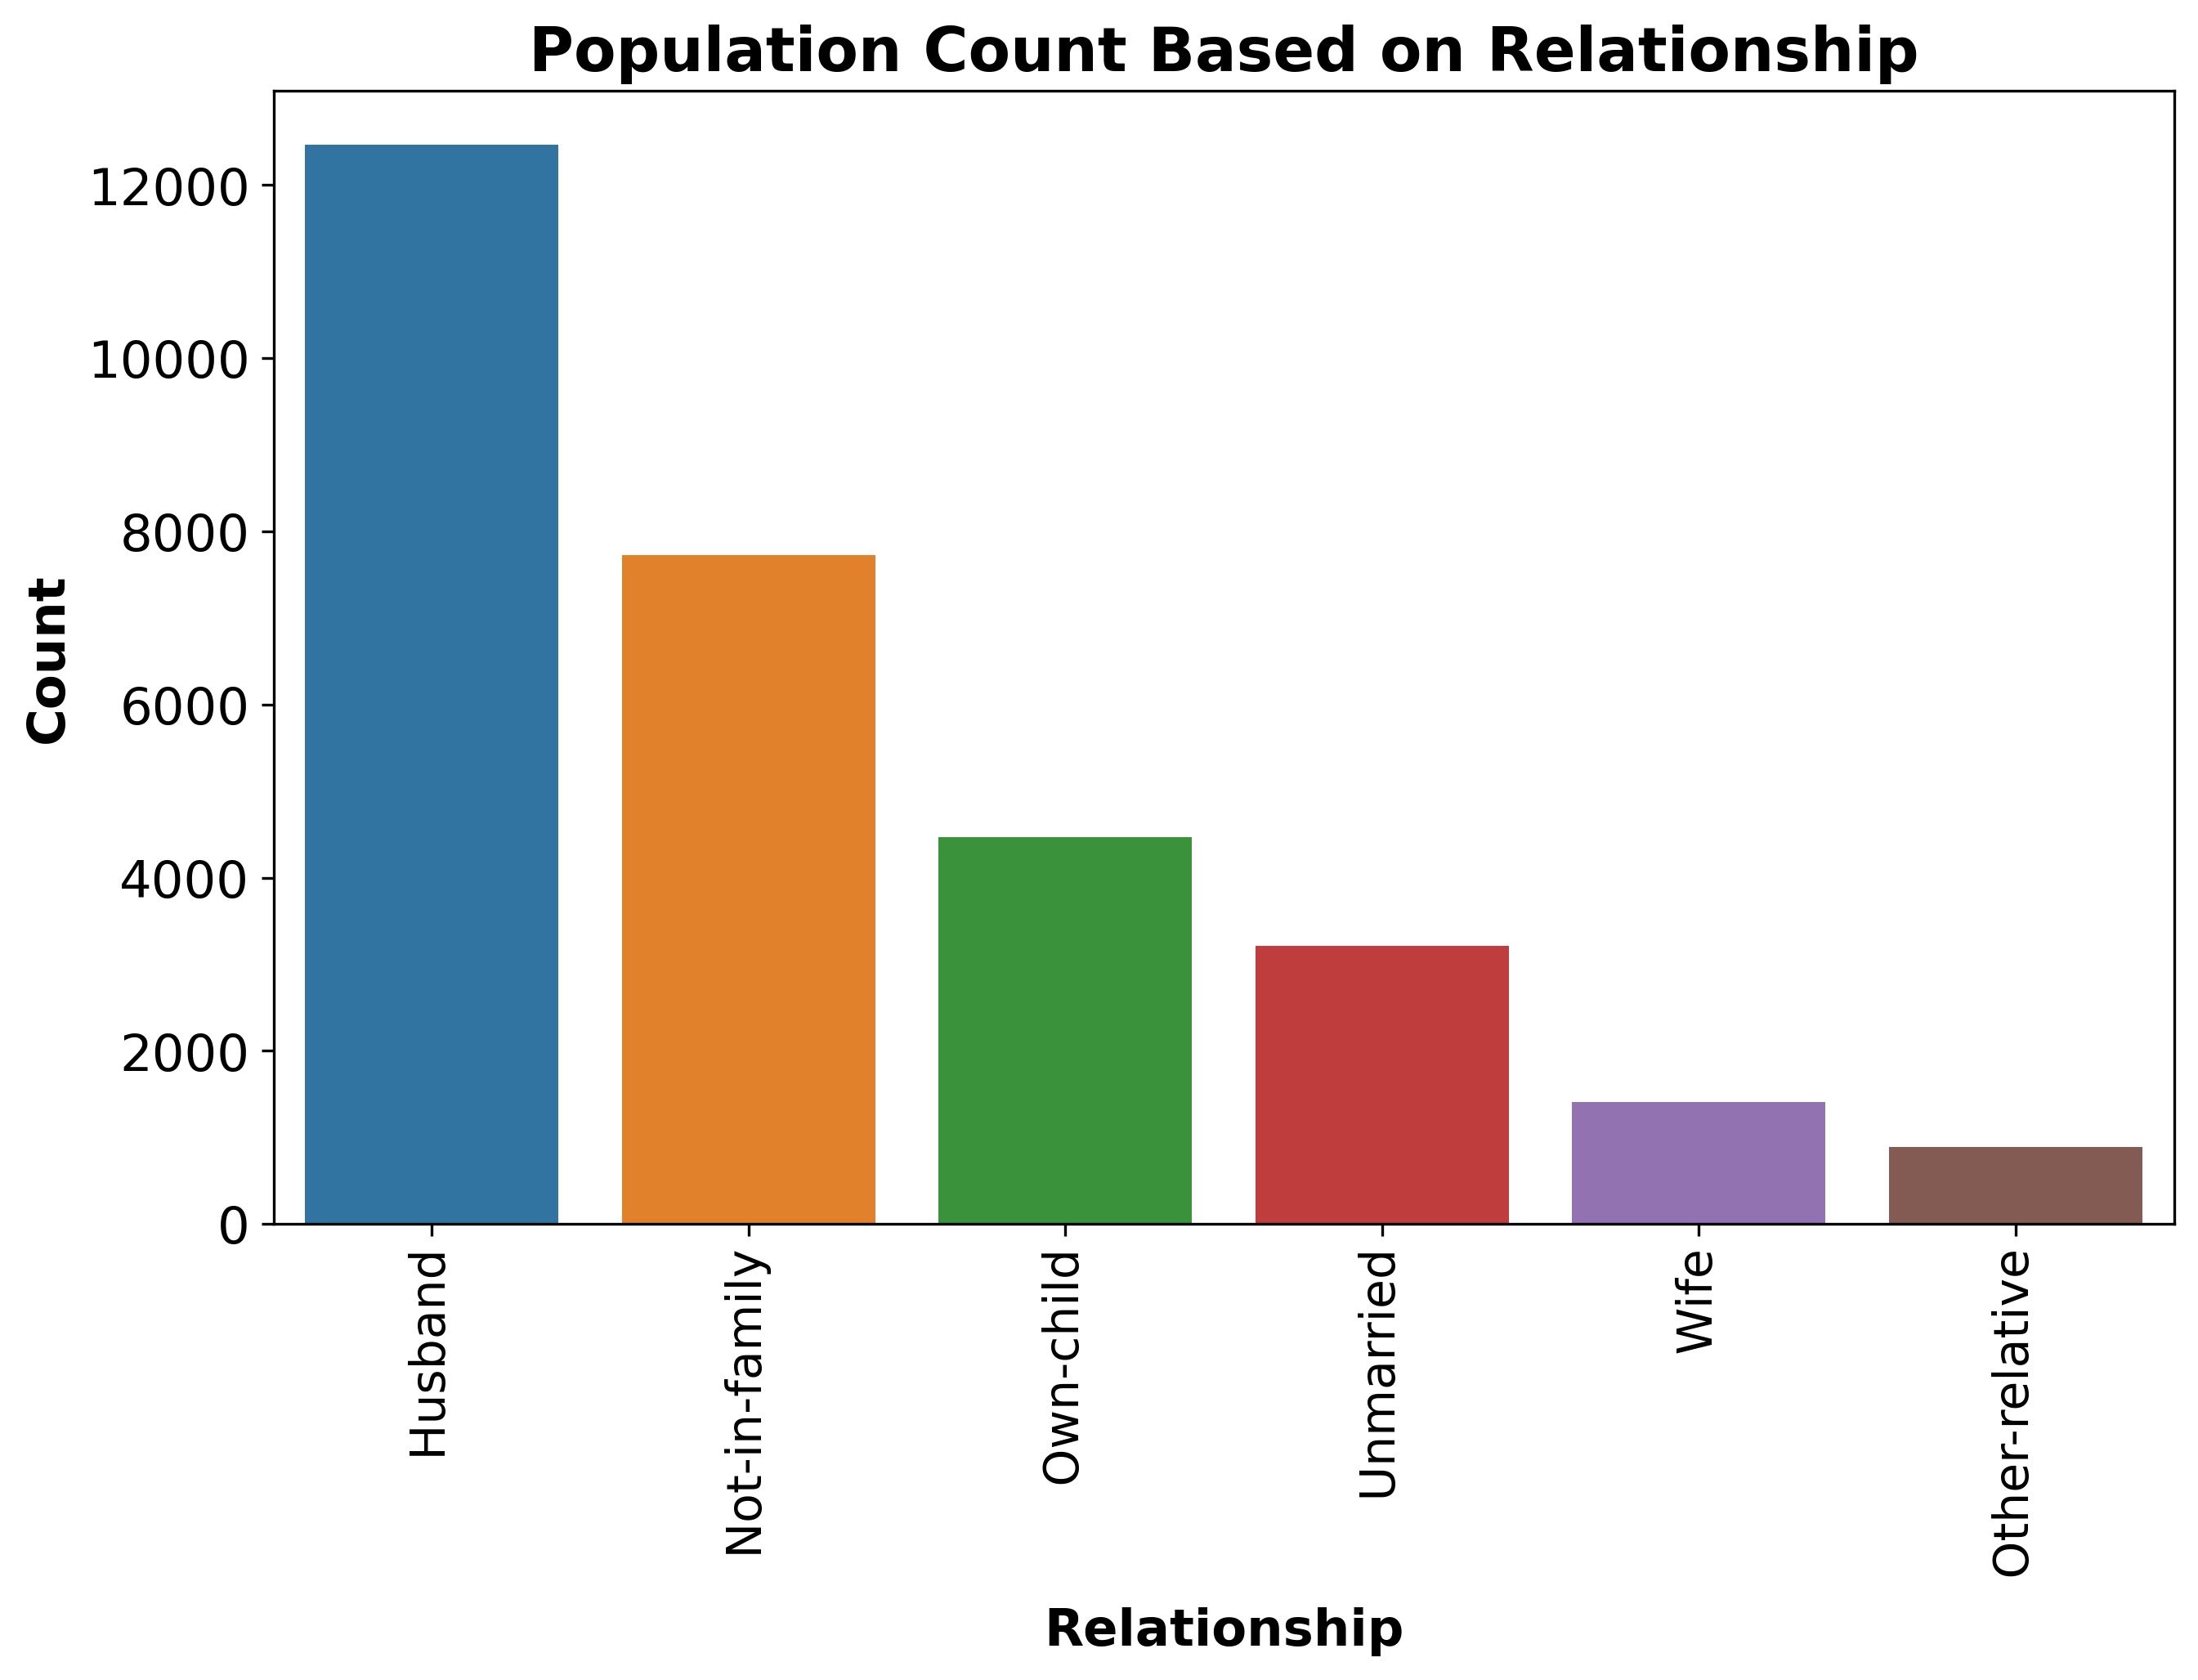

In [63]:
plt.figure(figsize=(10,6), dpi=300)
sns.countplot(x='relationship', data=df, order= df["relationship"].value_counts().index)
plt.xlabel("Relationship", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight= "bold")
plt.xticks(rotation="vertical", fontsize= 14)
plt.yticks(fontsize=15)
#plt.legend(bbox_to_anchor=(1,1), fontsize=14)
plt.title("Population Count Based on Relationship", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('survive1.png', dpi=300)

Text(0.5, 1.0, 'Income Visualization Based on Relationship')

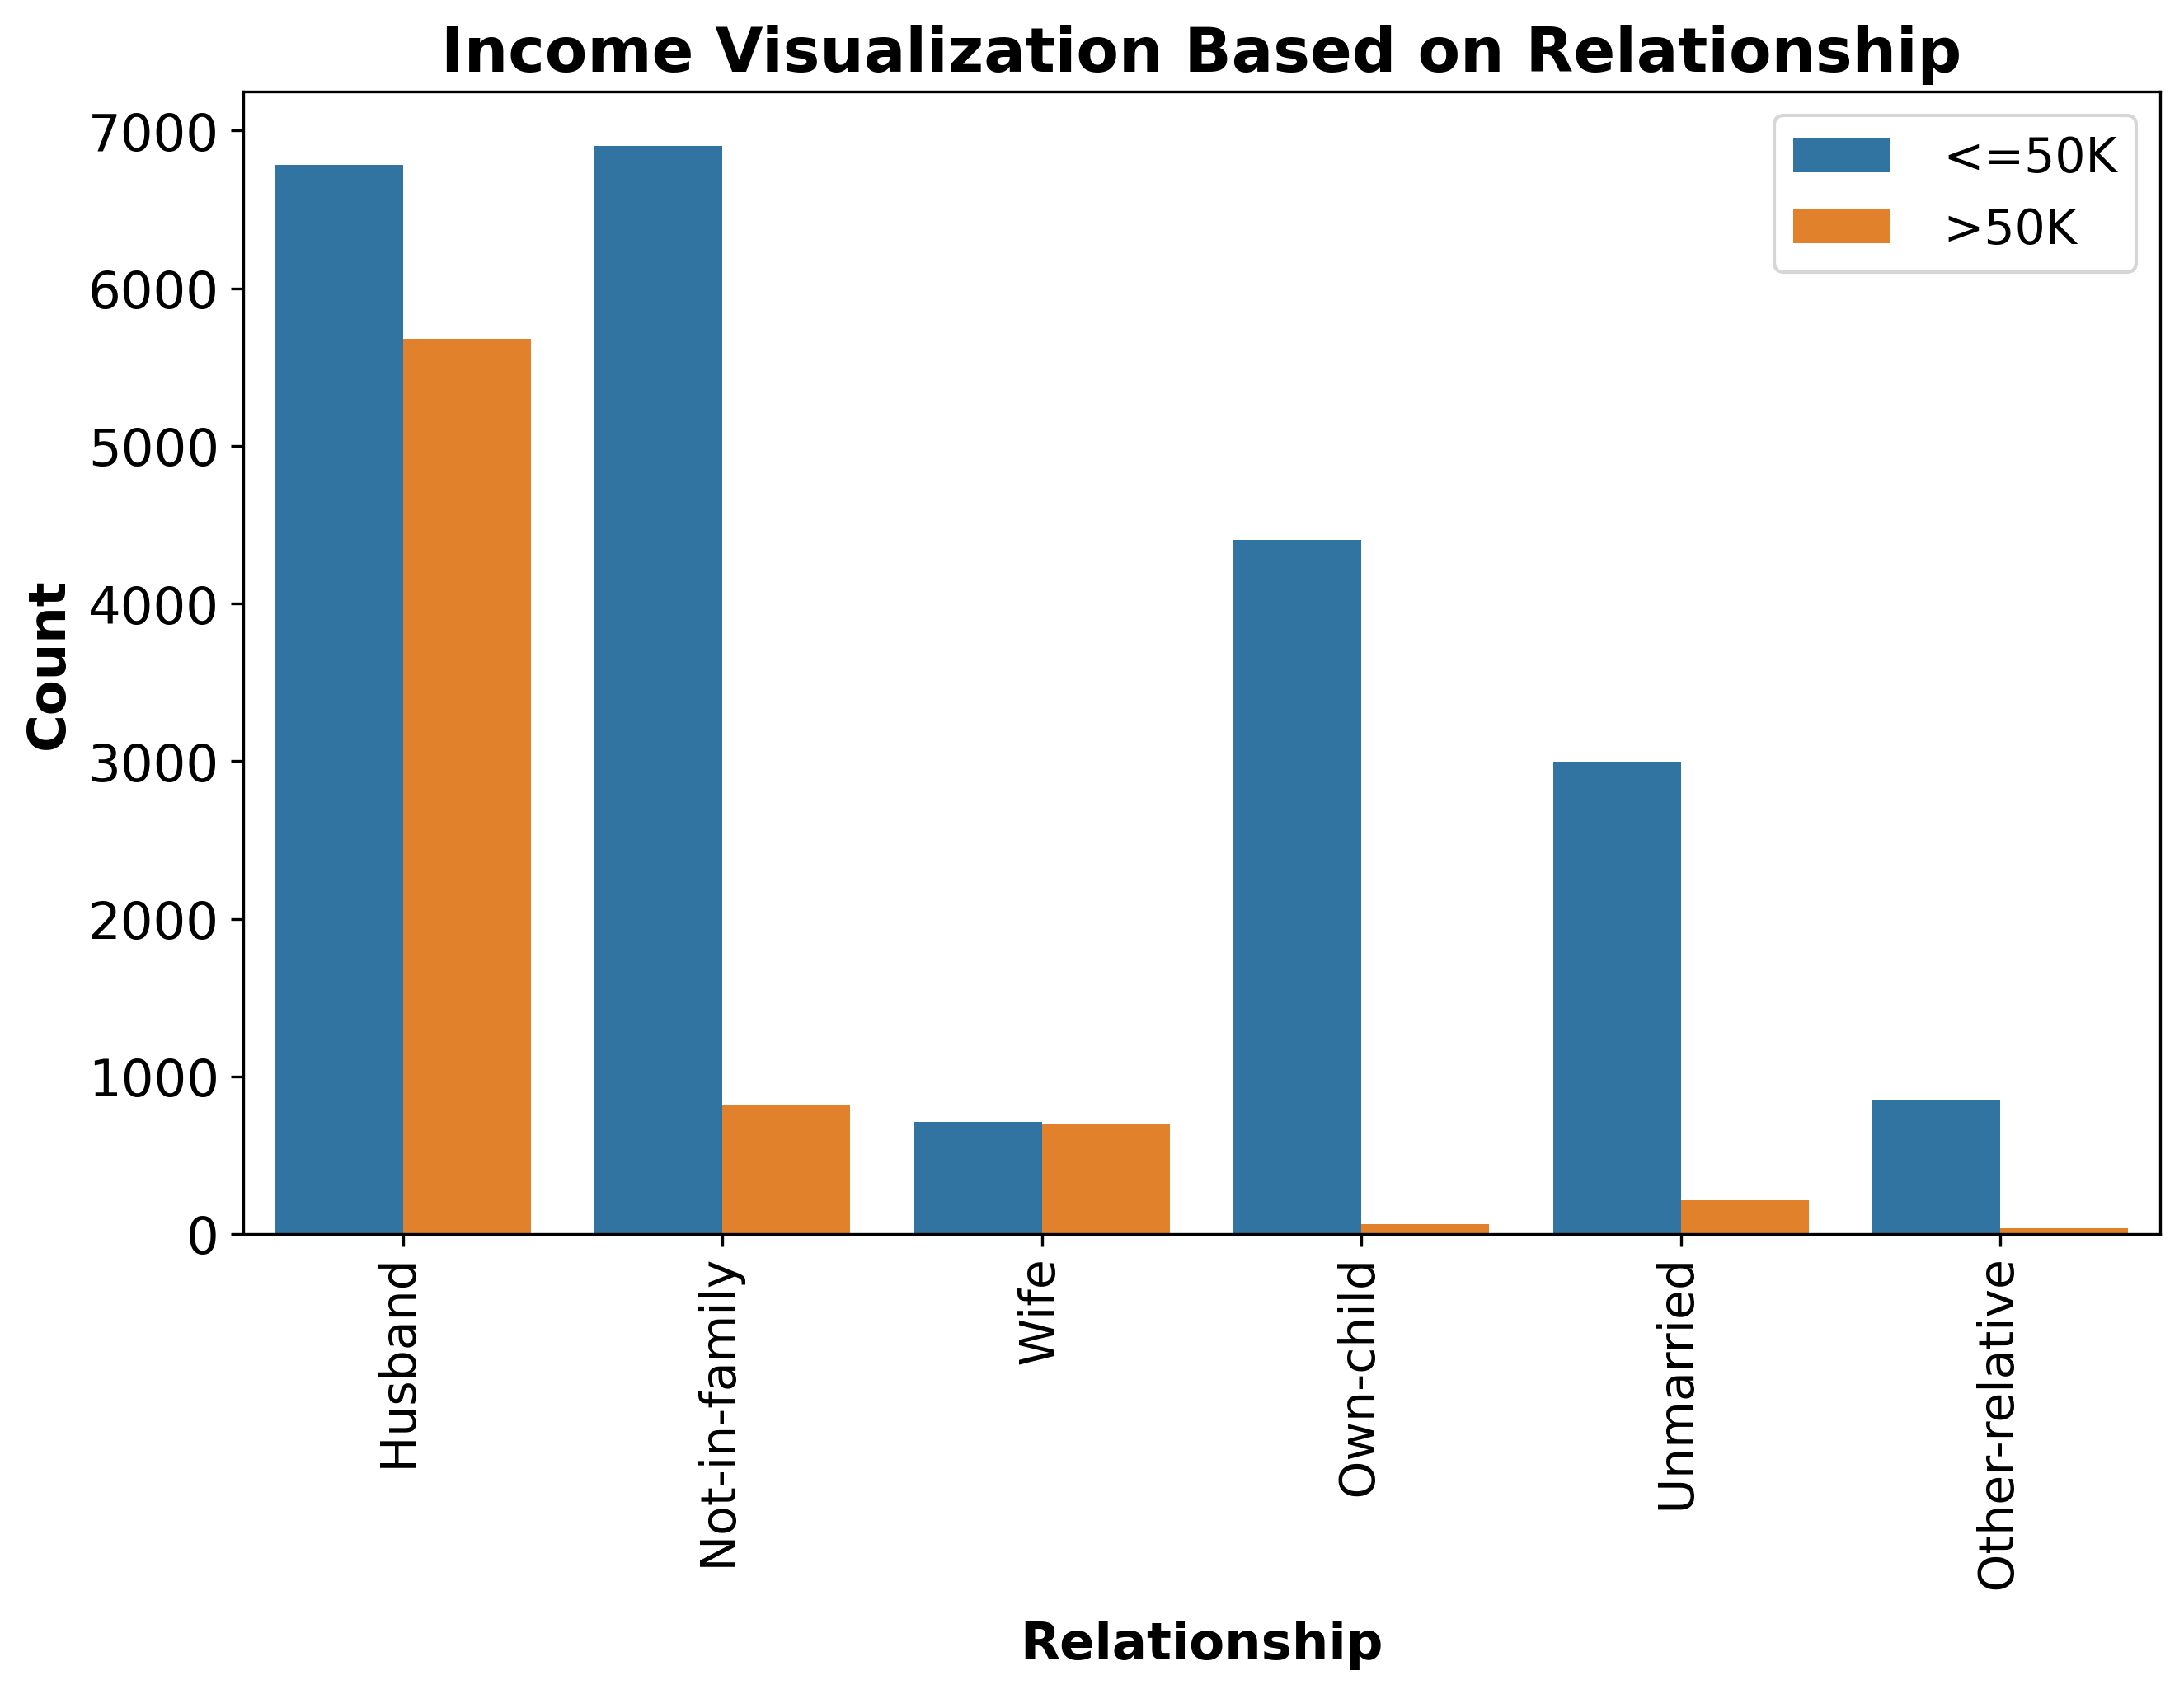

In [64]:
plt.figure(figsize=(10,6), dpi=300)
sns.countplot(x='relationship', data=df, hue="income")
plt.xlabel("Relationship", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight= "bold")
plt.xticks(rotation="vertical", fontsize= 14)
plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(1,1), fontsize=14)
plt.title("Income Visualization Based on Relationship", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('survive1.png', dpi=300)

It shows that family responsible persons are more likely to look for high paid salary. Such as husband and wife. There is almost equal probability of working for less as well as high wages. However, the unmarried or who are not staying in family dont bother about wages. Just they want to survive, that's all.

##### Based on Race

Text(0.5, 1.0, 'Population Count Based on Race')

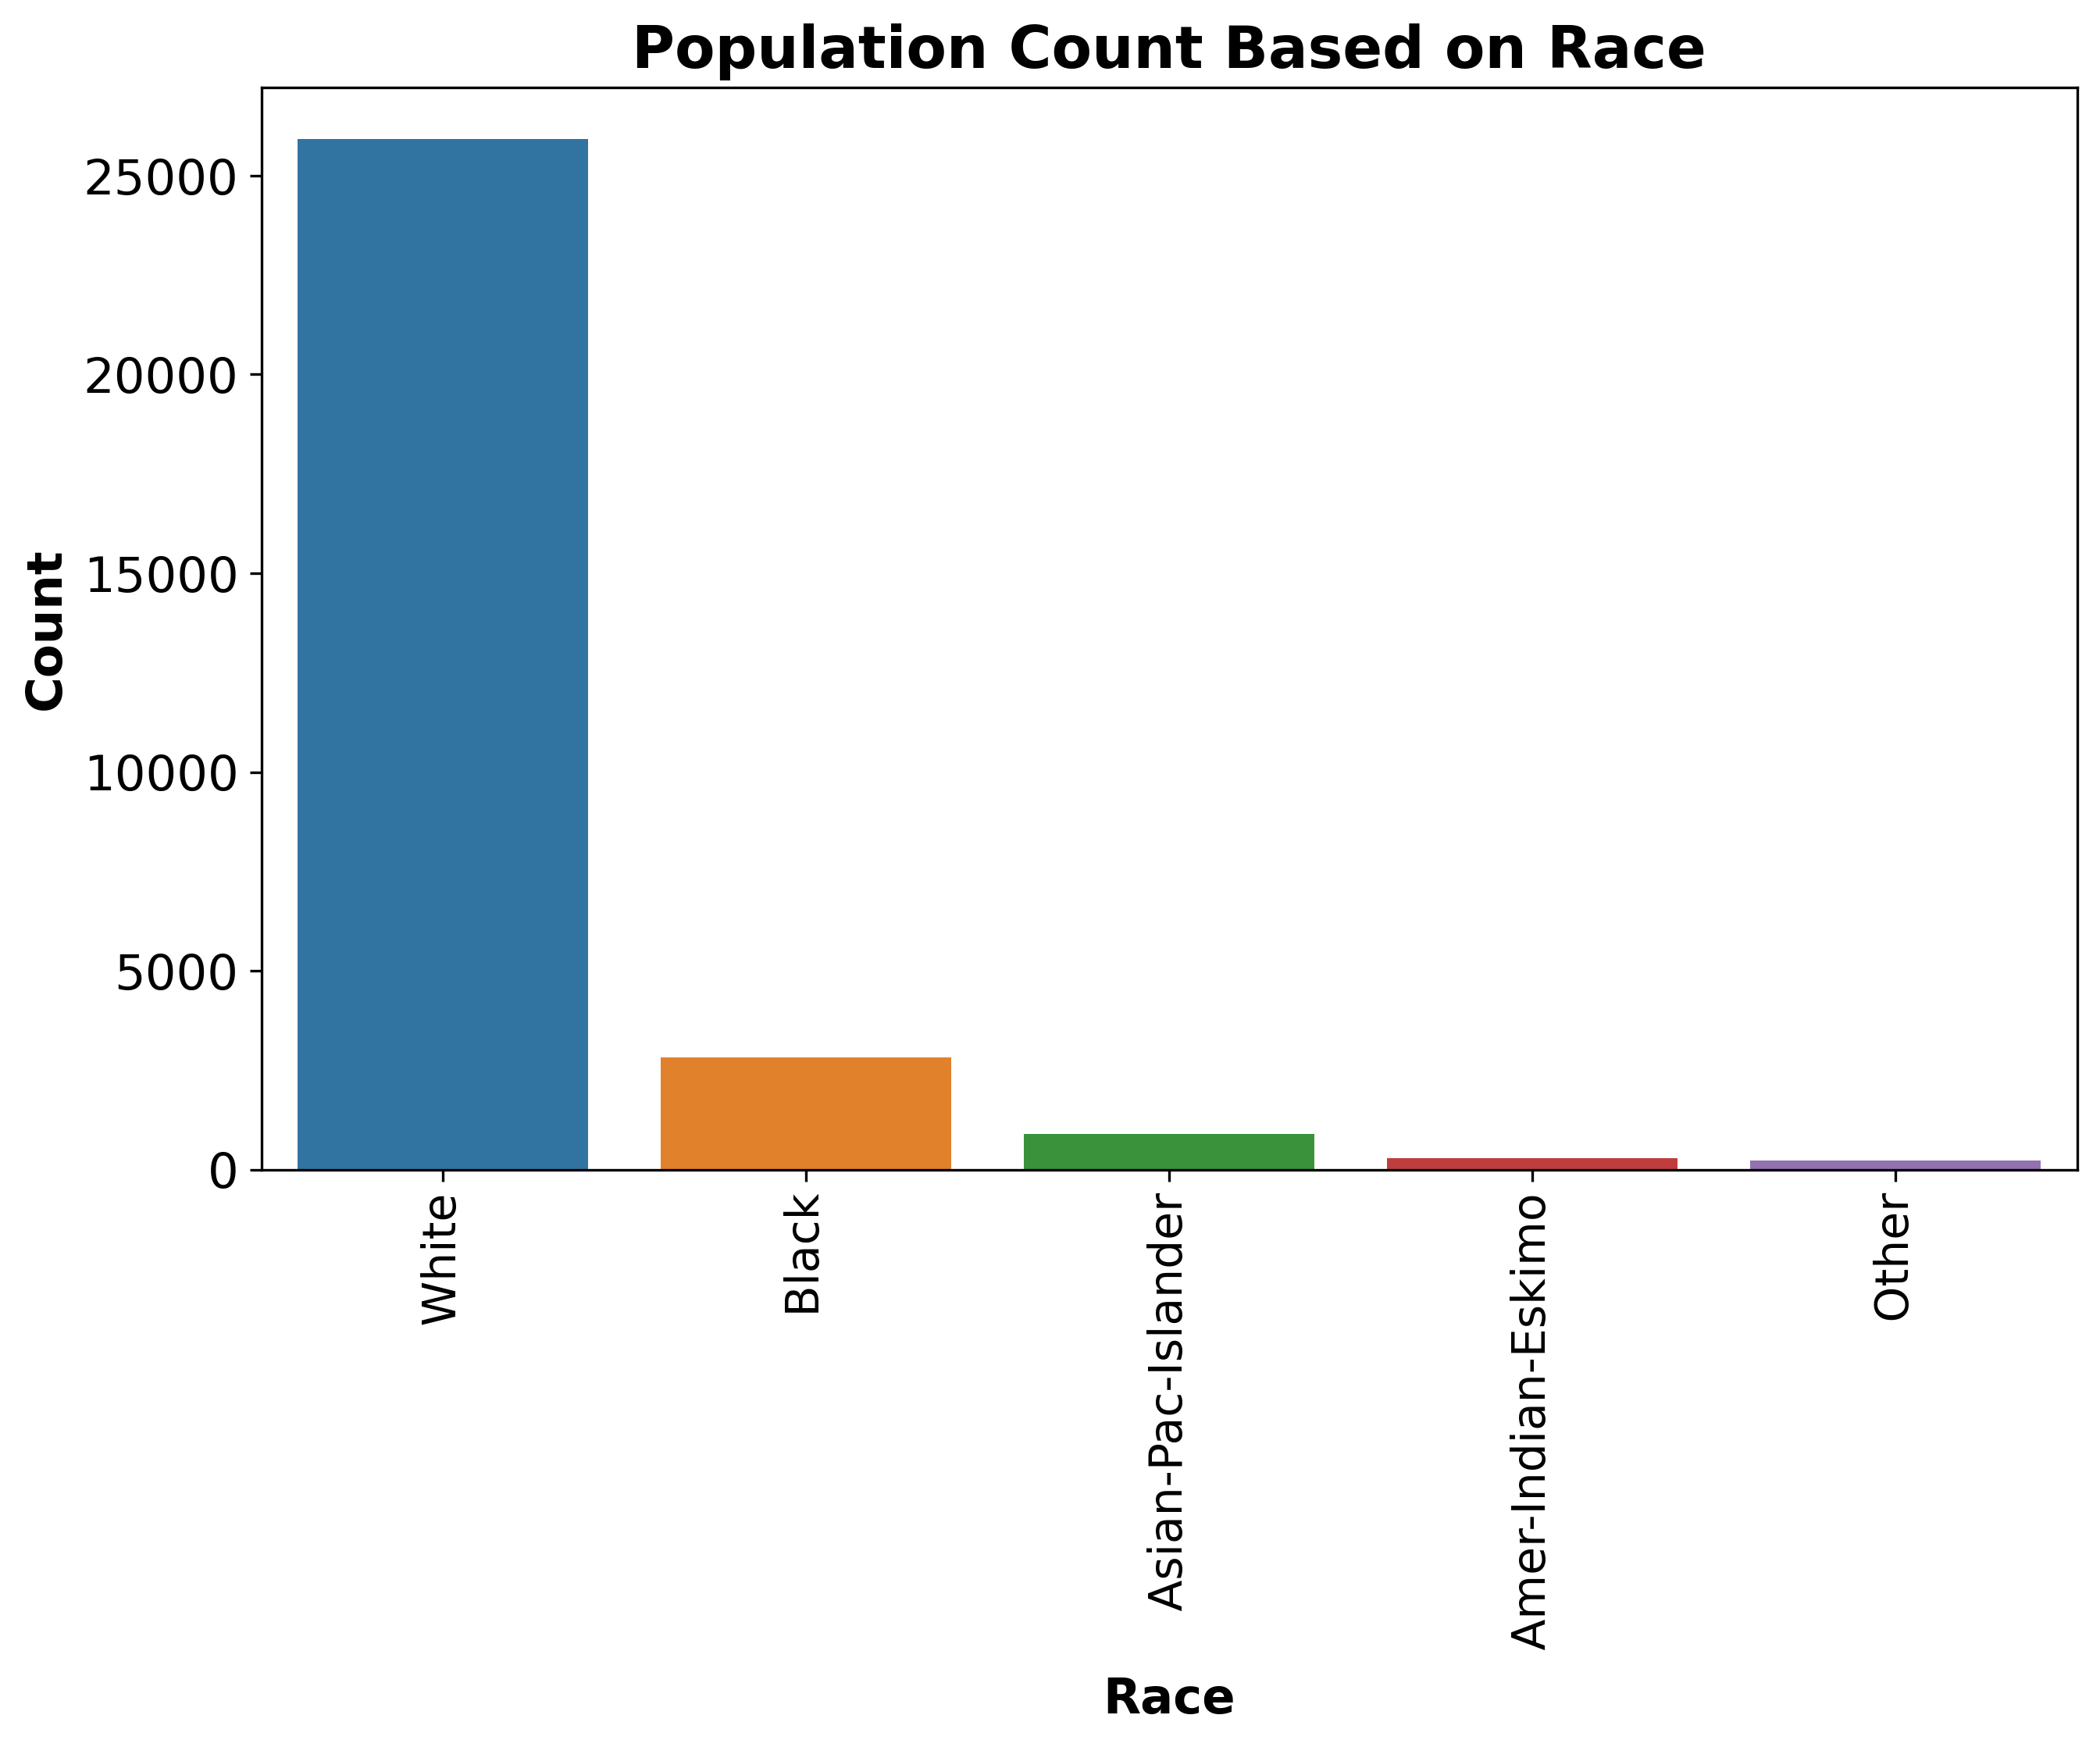

In [65]:

plt.figure(figsize=(10,6), dpi=300)
sns.countplot(x='race', data=df, order= df["race"].value_counts().index)
plt.xlabel("Race", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight= "bold")
plt.xticks(rotation="vertical", fontsize= 14)
plt.yticks(fontsize=15)
#plt.legend(bbox_to_anchor=(1,1), fontsize=14)
plt.title("Population Count Based on Race", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('survive1.png', dpi=300)

It shows that white people have dominant in the working environment. In comparison of number of white workers, others are insignificant.

In [16]:
df.shape

(30161, 15)

In [15]:
df.groupby(df['race'])['sex'].count()

race
 Amer-Indian-Eskimo      286
 Asian-Pac-Islander      895
 Black                  2817
 Other                   231
 White                 25932
Name: sex, dtype: int64

In [17]:
25932/30161

0.8597858161201551

##### Based on Native Country

Text(0.5, 1.0, 'Population Count Based on Native')

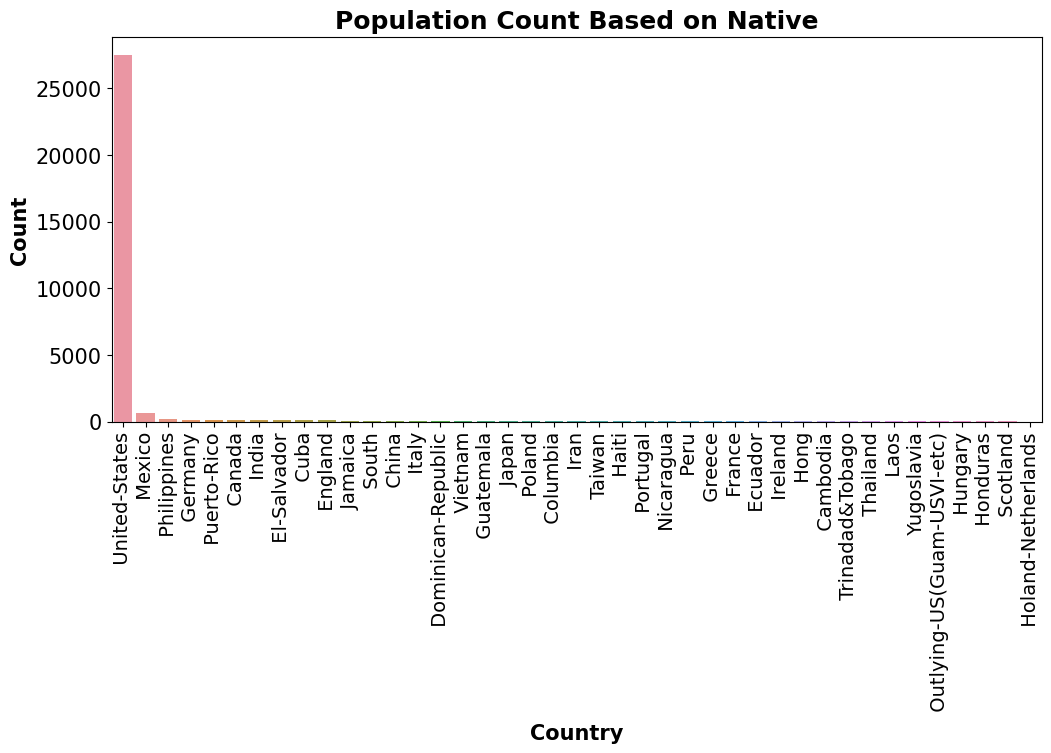

In [317]:

plt.figure(figsize=(12,5))
sns.countplot(x='native_country', data=df, order= df["native_country"].value_counts().index)
plt.xlabel("Country", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight= "bold")
plt.xticks(rotation="vertical", fontsize= 14)
plt.yticks(fontsize=15)
#plt.legend(bbox_to_anchor=(1,1), fontsize=14)
plt.title("Population Count Based on Native", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('survive1.png', dpi=300)

It shows that about more than 95% of the workers are United State.

##### Based on Working hours

Text(0.5, 1.0, 'Income against working hours per week')

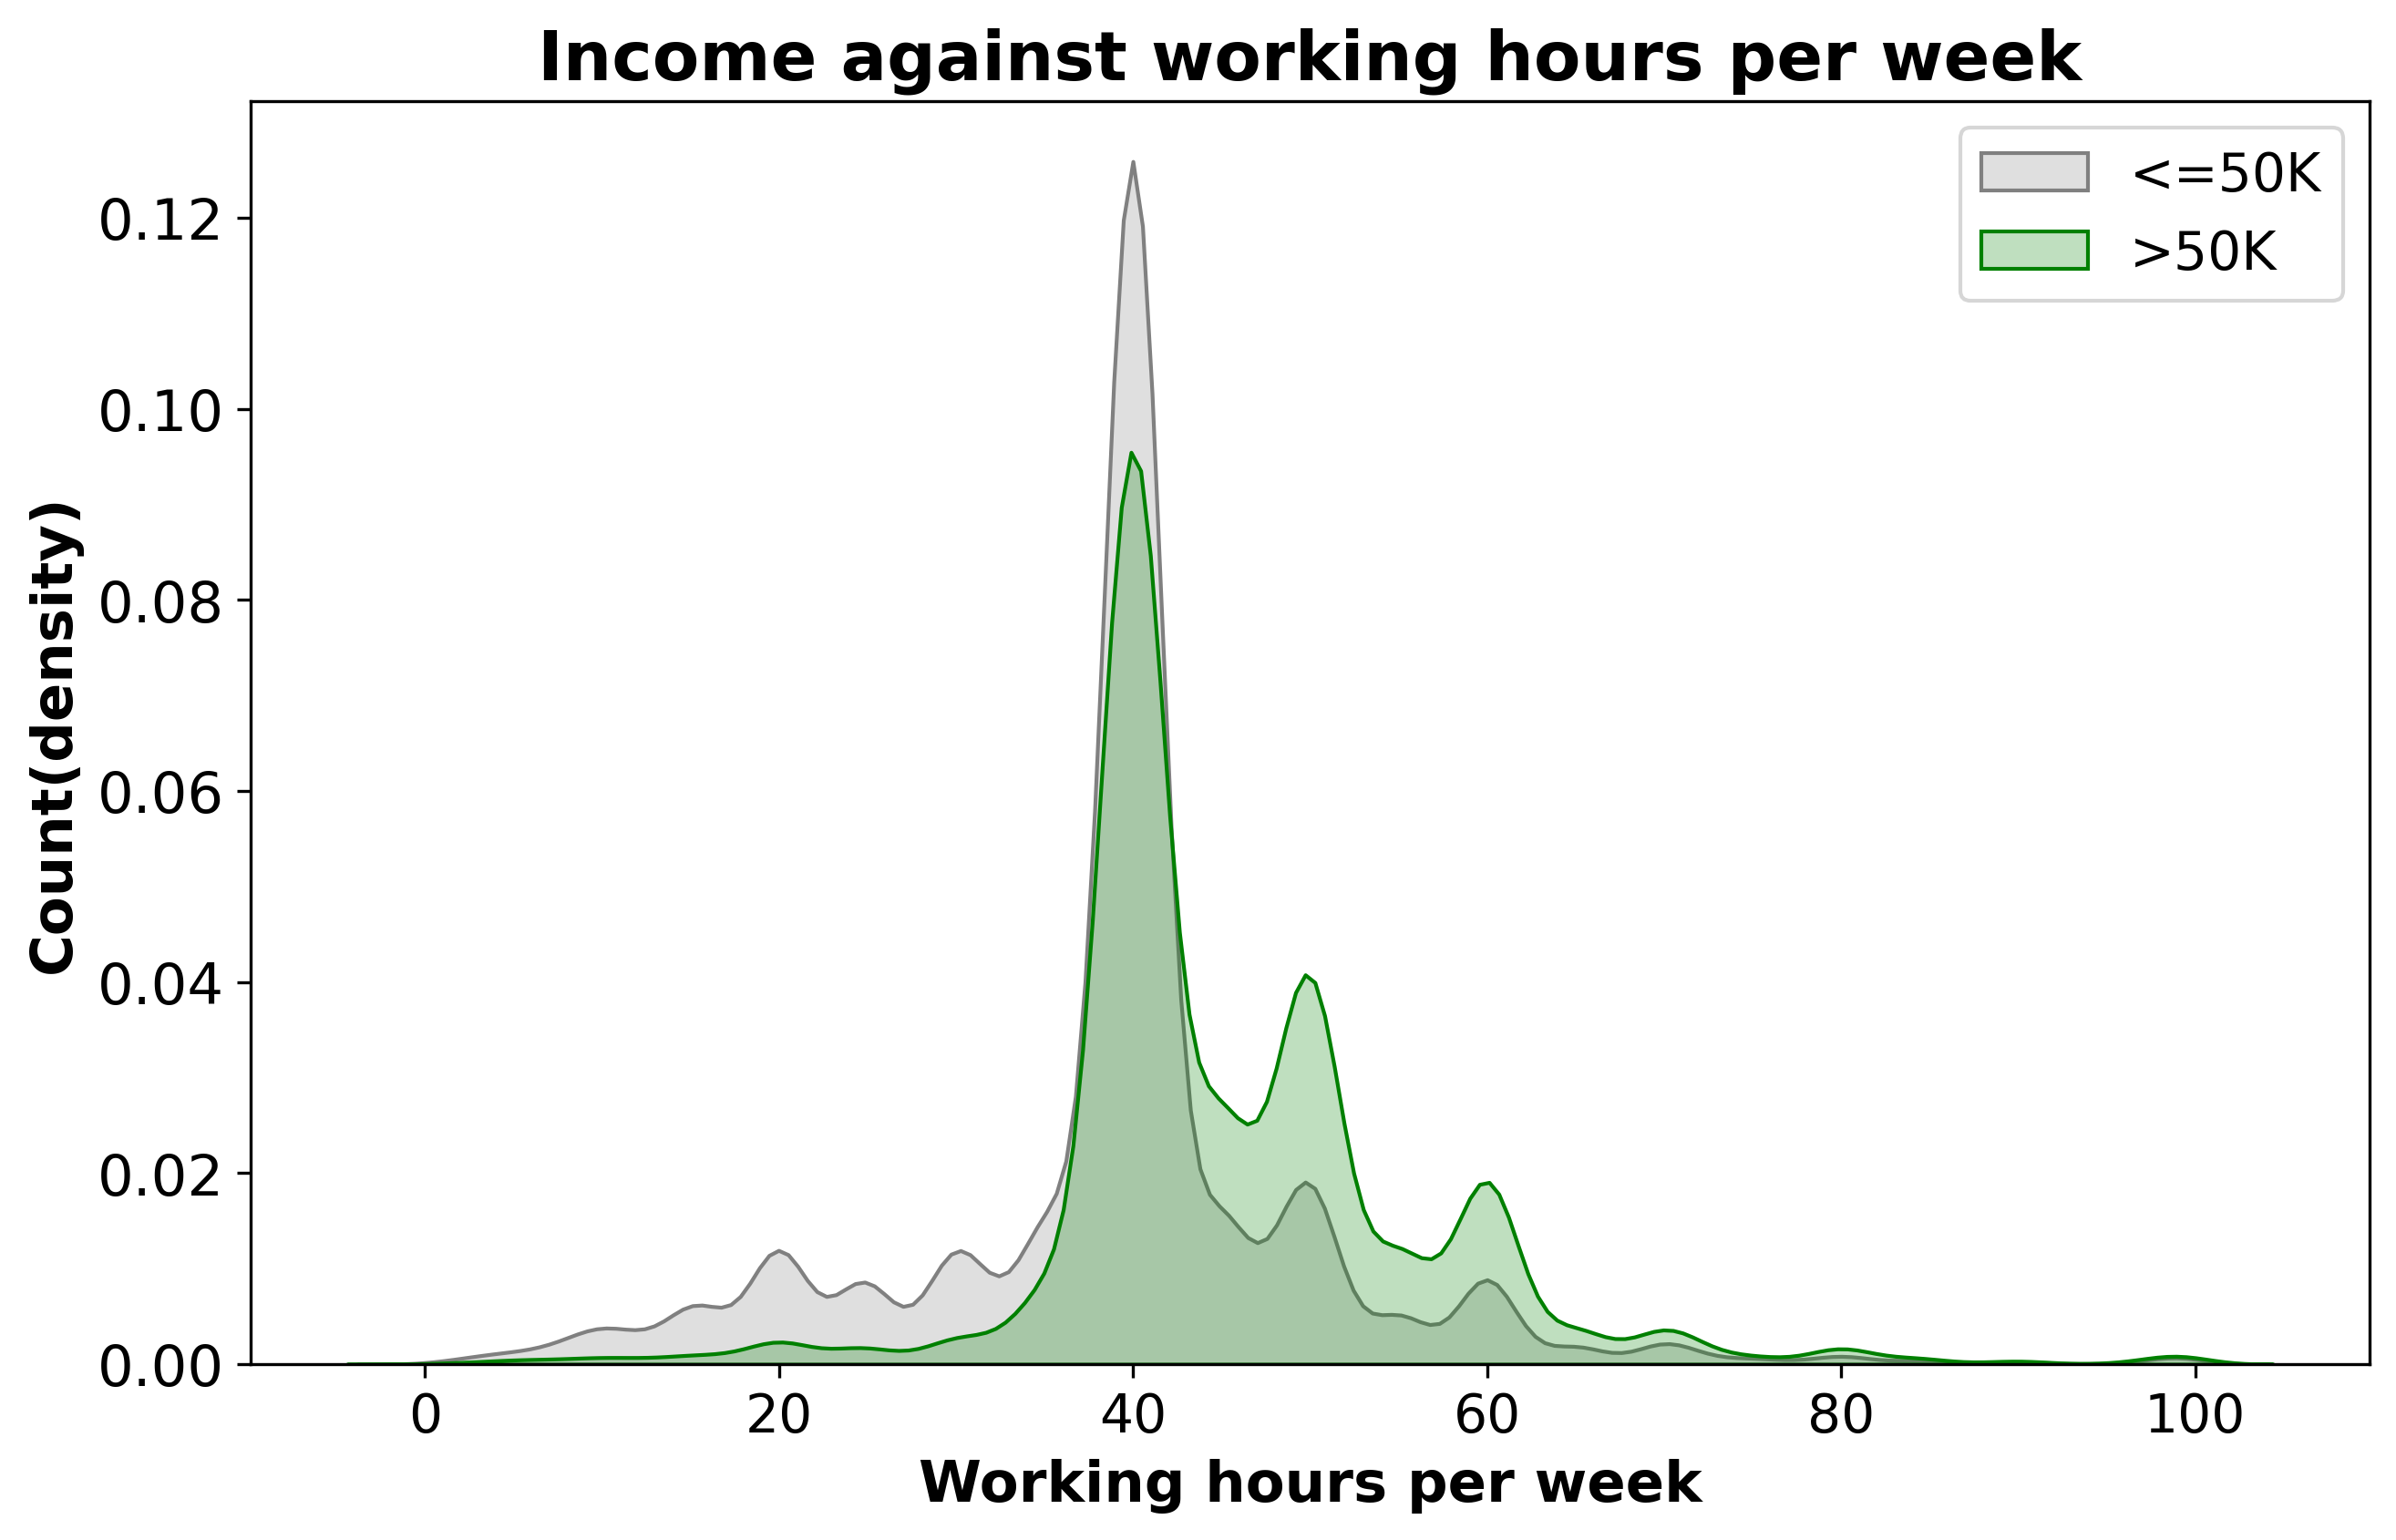

In [82]:
plt.figure(figsize=(10,6), dpi=300)
ax=sns.kdeplot(df.loc[(df['income'] ==" <=50K"),'hours_per_week'] , color='gray',shade=True,label='<=50K')
ax=sns.kdeplot(df.loc[(df['income'] == " >50K"),'hours_per_week'] , color='g',shade=True, label='>50K')
plt.xlabel("Working hours per week", fontsize=15, fontweight="bold")
plt.ylabel("Count(density)", fontsize=15, fontweight= "bold")
plt.xticks(fontsize= 14)
plt.yticks(fontsize=15)
plt.legend(loc="upper right", fontsize=14)
plt.title("Income against working hours per week", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('survive1.png', dpi=300)

Generally working hours for the workers is about 45 hours per week. 

#### Classification Model

FEATURE ENGINEERING

Here data features are analysed with respect of correlation, categorical data is converted into numerical form and impactfull features are selected for building predictive model

In [319]:
# making a copy of our dataset
df_new= df.copy()

##### Selection of Features based on Uniqueness of data

In [322]:
#Printing the unique value for each features
for i in df_new:
    print ("---- %s ---" % i)
    print (df[i].nunique())

---- age ---
72
---- workclass ---
7
---- fnlwgt ---
20262
---- education ---
16
---- education_num ---
16
---- marital_status ---
7
---- occupation ---
14
---- relationship ---
6
---- race ---
5
---- sex ---
2
---- capital_gain ---
118
---- capital_loss ---
90
---- hours_per_week ---
94
---- native_country ---
41
---- income ---
2


Here we found some features('age', 'fnlwgt', 'capital.gain','capital.loss', 'native.country','education.num') which have comparatively large unique values. Since these features can make our predictive model biased, hence we drop those features.

In [324]:
df_new.drop(['age', 'fnlwgt', 'capital_gain','capital_loss', 'native_country','education_num'], axis=1, inplace=True)

In [325]:
list(df_new.columns)

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'hours_per_week',
 'income']

##### Converting Categorical into Numerical (Coding)

In [326]:
df_new.dtypes

workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
hours_per_week     int64
income            object
dtype: object

Except hours_per_week feature, other features are categorical type. Now we convert them into numeric type with the help of mapping.

In [329]:
#gender
df_new['sex'] = df_new['sex'].map({' Male': 0, ' Female': 1}).astype(int)

In [336]:
#race
df_new['race'] = df_new['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3,
 ' Amer-Indian-Eskimo': 4}).astype(int)

In [339]:
#marital_status
df_new['marital_status'] = df_new['marital_status'].map({' Married-spouse-absent': 0, ' Widowed': 1,
 ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4,' Never-married': 5, 
' Married-AF-spouse': 6}).astype(int)

In [340]:
#workclass
df_new['workclass']= df_new['workclass'].map({' Self-emp-inc': 0, ' State-gov': 1,' Federal-gov': 2, 
' Without-pay': 3, ' Local-gov': 4, ' Private': 5, ' Self-emp-not-inc': 6}).astype(int)

In [341]:
#relationship
df_new['relationship'] = df_new['relationship'].map({' Not-in-family': 0, ' Wife': 1, ' Other-relative': 2, ' Unmarried': 3,
' Husband': 4,' Own-child': 5}).astype(int)

In [343]:
#education
df_new['education']= df_new['education'].map({' Some-college': 0, ' Preschool': 1, ' 5th-6th': 2, ' HS-grad': 3, 
' Masters': 4, ' 12th': 5, ' 7th-8th': 6, ' Prof-school': 7,' 1st-4th': 8, ' Assoc-acdm': 9, ' Doctorate': 10, 
' 11th': 11,' Bachelors': 12, ' 10th': 13, ' Assoc-voc': 14,' 9th': 15}).astype(int)

In [345]:
#occupation
df_new['occupation'] = df_new['occupation'].map({' Farming-fishing': 0, ' Tech-support': 1, 
' Adm-clerical': 2, ' Handlers-cleaners': 3, ' Prof-specialty': 4,' Machine-op-inspct': 5, ' Exec-managerial': 6,
' Priv-house-serv': 7,' Craft-repair': 8,' Sales': 9, ' Transport-moving': 10, ' Armed-Forces': 11, 
' Other-service': 12,' Protective-serv':13}).astype(int)

In [351]:
df_new['income']= df_new['income'].map({" <=50K":0, " >50K":1}).astype(int)

In [352]:
df_new.dtypes

workclass         int32
education         int32
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
hours_per_week    int64
income            int32
dtype: object

Now we have got all features as numerical type

##### Correlation Analysis

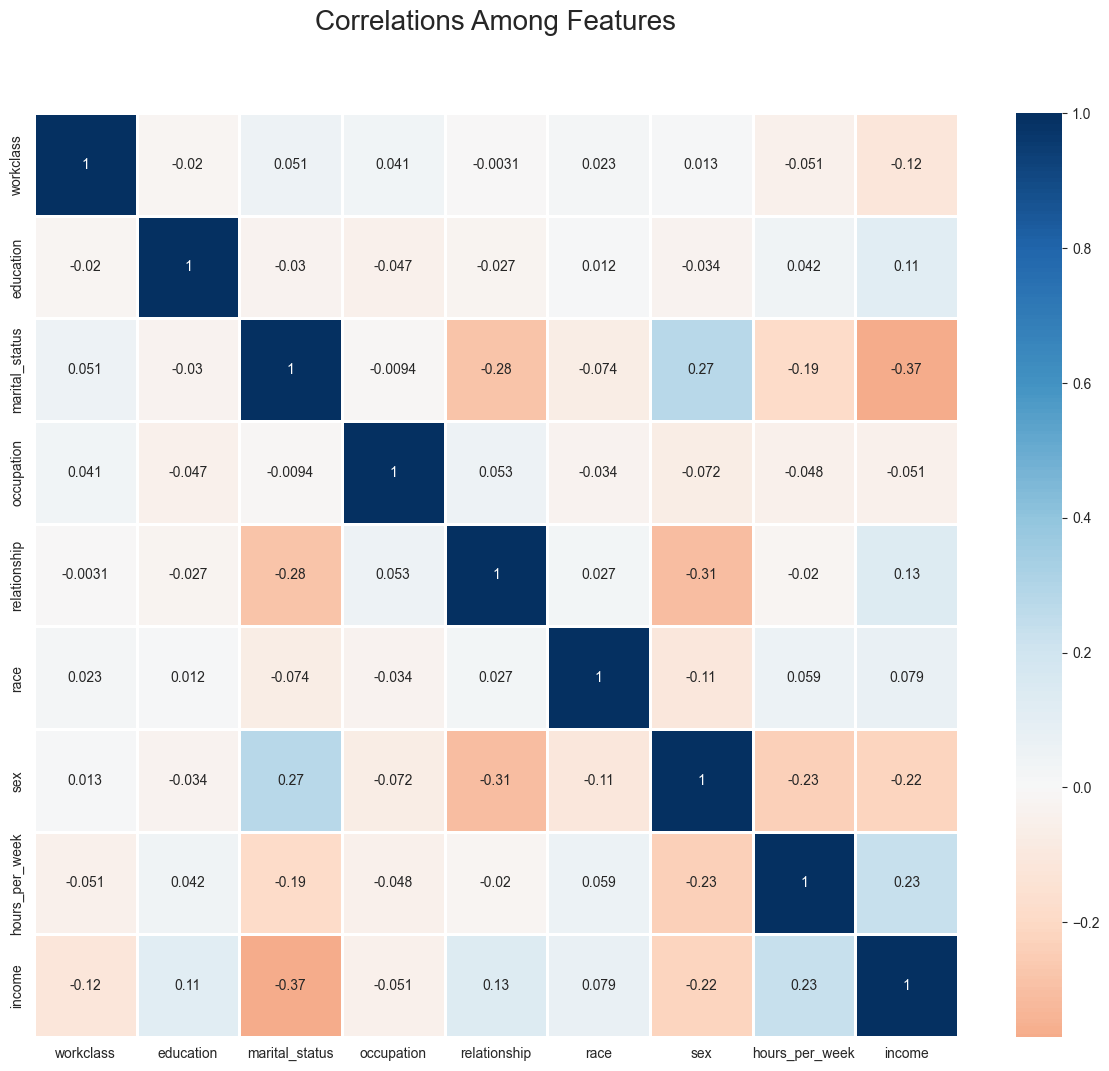

In [353]:
#Visualizing the correlation among the features using heatmap

#mask = np.zeros_like(df_train.corr(), dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(df_new.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40)

From this correlation diagram, we can conclude that there is +ve correlation between between income and education, income and relationship, income and race, income and hours_per_week.

there is negative correlation between income and merital_status, income and sex.

##### Train Test Split

Dependent variable =====> Income (less than 50K or Greater than 50K)
Independent variables ======> remaining

In [354]:
X = df_new.drop('income',axis=1)
Y = df_new.income

In [356]:
print("X shape : ", X.shape)
print("y shape : ", Y.shape)

X shape :  (30161, 8)
y shape :  (30161,)


In [359]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42,shuffle=True)


In [360]:
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("===============================")
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (20207, 8)
X_test shape :  (9954, 8)
y_train shape :  (20207,)
y_test shape :  (9954,)


##### Classifier Model (NAIVE BAYES)

A naive Bayes classifier assumes that the presence (or absence) of a particular feature of a class is unrelated to the presence (or absence) of any other feature, given the class variable. Basically, it’s “naive” because it makes assumptions that may or may not turn out to be correct.

In [362]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

# Train the model using the training sets
gnb = model.fit(X_train,Y_train)


Prediction

In [363]:
predictions = gnb.predict(X_test)

Accuracy Checking

In [364]:
from sklearn.metrics import accuracy_score

accuracy_log_naive_bayes = accuracy_score(Y_test, predictions)

In [365]:
#printing the accuracy values 
print(f"The accuracy of the model is {round(accuracy_score(Y_test,predictions),3)*100} %")

The accuracy of the model is 72.5 %


In [367]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(Y_test,predictions),\
            columns=["Predicted <=50K", "Predicted >50K"],\
            index=["<=50K",">50K"] )

,Predicted <=50K,Predicted >50K
<=50K,5511,2013
>50K,722,1708


In [368]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      7524
           1       0.46      0.70      0.56      2430

    accuracy                           0.73      9954
   macro avg       0.67      0.72      0.68      9954
weighted avg       0.78      0.73      0.74      9954



##### Overfitting Checking

In [369]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, Y_test)))

Training set score: 0.7326
Test set score: 0.7252


The training-set accuracy score is 0.7326 while the test-set accuracy to be 0.7252. These two values are quite comparable. So, there is no sign of overfitting.